<a href="https://www.kaggle.com/code/nurjanah28/prediksi-bank-customer-churn?scriptVersionId=109597553" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#**Prediksi Bank Customer Churn Dengan Machine Learning**
Customer churn adalah hilangnya pelanggan yang berpindah dari satu sektor ke pesaing lain dalam waktu tertentu. Industri perbankan yang termasuk kedalam sektor financial tentu menghadapi tantangan mengenai permasalahan churn ini. Customer churn ini tentu saja meresahkan apabila tidak ditangani karena akan beresiko dalam penurunan revenue perusahaan. Data customer bank yang berjumlah besar dapat dimanfaatkan untuk membangun model prediksi customer churn dengan menggunakan machine learning. Model prediksi yang dibangun dapat digunakan untuk strategi pelanggan guna meningkatkan customer retention.

In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
#import time
import time

In [2]:
#Read dataset
import pandas as pd 
df = pd.read_csv('../input/churn-dataset/dataset_churn.csv')
df.shape

(10000, 14)

In [3]:
#Read the first five data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Explanatory Data Analysis

In [4]:
#Check if the column is null or empty
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Rename label target
df.rename(columns = {'Exited':'Churn'}, inplace = True)

In [6]:
#Calculate target label value
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [7]:
#Import library EDA
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

Text(0, 0.5, 'Count')

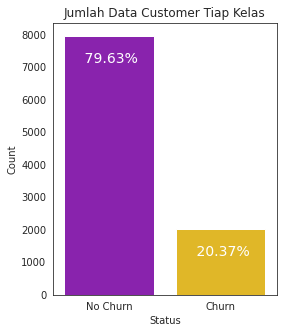

In [8]:
#Create countplot for target label ratio comparison
colors = ['#940cc4', '#ffc809', '#b80056', '#44b875', '#004369' ] 

sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Jumlah Data Customer Tiap Kelas', fontsize=12)
total = float(len(df))
ax=sns.countplot(x="Churn",  data=df, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {100*p.get_height()/total}%', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

([<matplotlib.patches.Wedge at 0x7fbfc68d0610>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'No Churn'),
  Text(0.8823431426537006, -0.6568642010431012, 'Churn')],
 [Text(-0.48127807781110943, 0.3582895642053278, '80%'),
  Text(0.4812780778111093, -0.35828956420532787, '20%')])

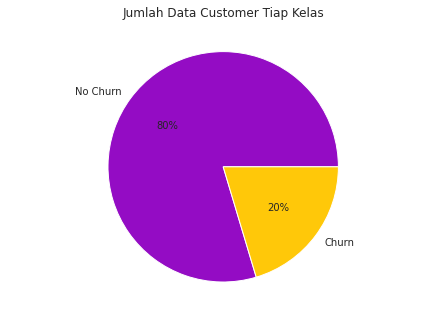

In [9]:
#Create piechart for target label ratio comparison
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No Churn','Churn']
ax.set_title("Jumlah Data Customer Tiap Kelas")
ax.set_xticklabels(['No Churn', 'Churn'])
exited = df.Churn.value_counts()
ax.pie(exited, colors=colors, labels=labels, autopct='%.0f%%')

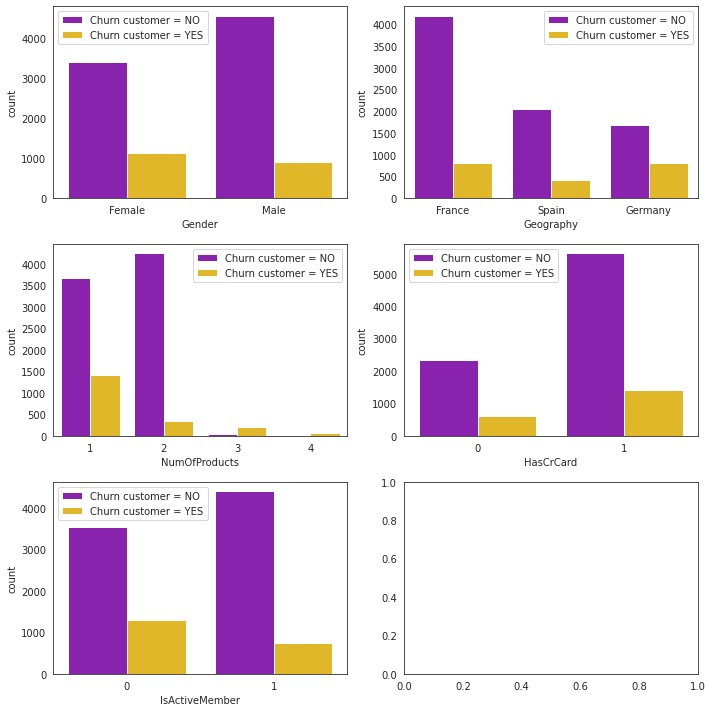

In [10]:
#Create a countplot to compare the value of target labels per each categorical feature
cat_feature = ['Gender', 'Geography', 'NumOfProducts','HasCrCard', 'IsActiveMember']

fig, axs = plt.subplots(3, 2, figsize=(10,10))
for i, feature in enumerate(cat_feature,1):
    plt.subplot(3, 2, i)
    p = sns.countplot(df[feature], hue = df['Churn'], palette=colors)
    legend_labels, _= p.get_legend_handles_labels()
    p.legend(legend_labels, ['Churn customer = NO','Churn customer = YES'])
plt.tight_layout()

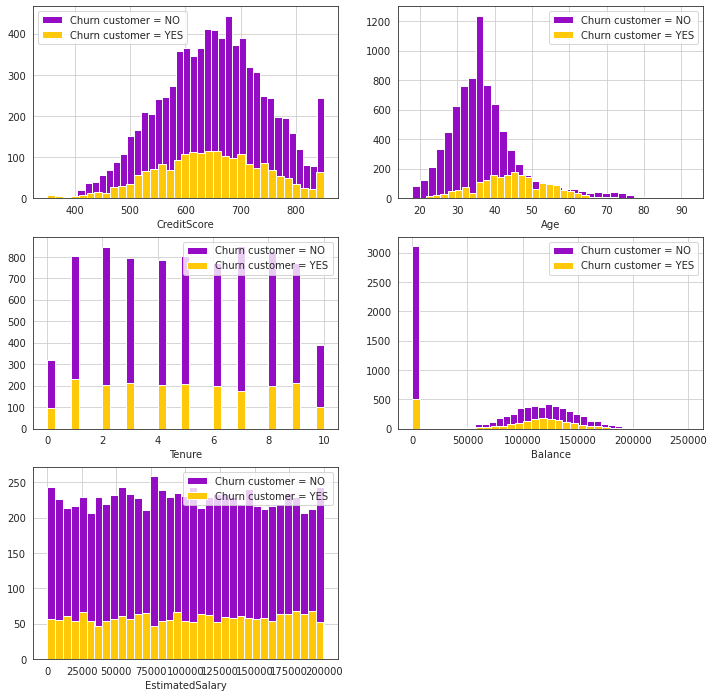

In [11]:
#Create plots two histogram overlays per each numeric feature
num_feature = ['CreditScore', 'Age','Tenure','Balance','EstimatedSalary']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(num_feature, 1):
    plt.subplot(3, 2, i)
    df[df.Churn == 0][feature].hist(bins=35, color=colors[0], label='Churn customer = NO', alpha=1)
    df[df.Churn == 1][feature].hist(bins=35, color=colors[1], label='Churn customer = YES', alpha=1)
    plt.legend()
    plt.xlabel(feature)

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Text(0.5, 1.0, 'Korelasi Heatmap pada Dataset')

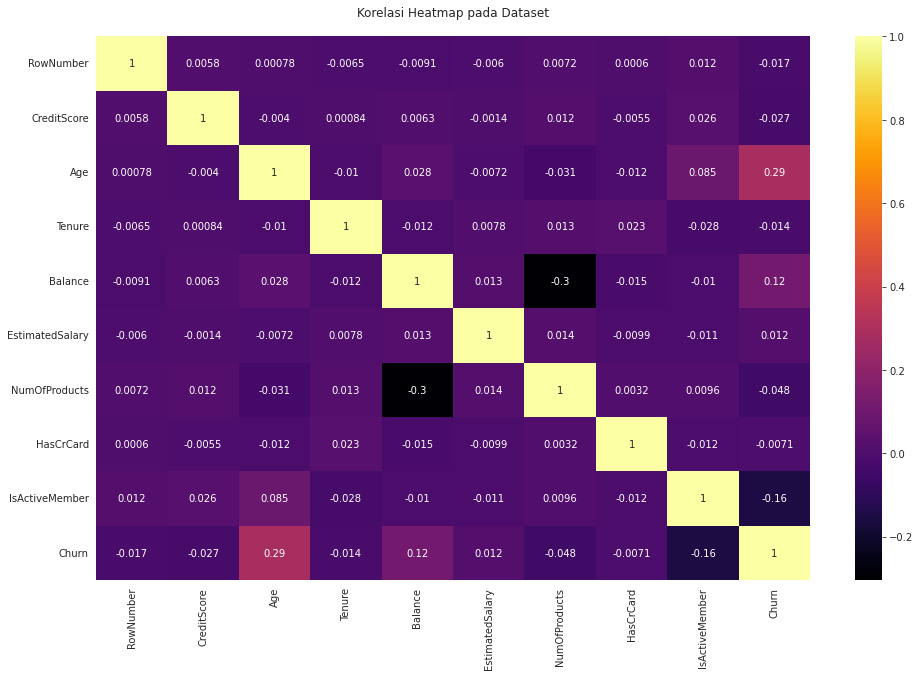

In [13]:
#Create a heatmap to correlate each feature
plt.figure(figsize = (16,10))
dfc = df[['RowNumber','CreditScore', 'Age','Tenure','Balance','EstimatedSalary','Gender', 'Geography', 'NumOfProducts','HasCrCard', 'IsActiveMember','Churn']]
sns.heatmap(dfc.corr(), annot =True, cmap="inferno")
plt.title("Korelasi Heatmap pada Dataset", pad=20)

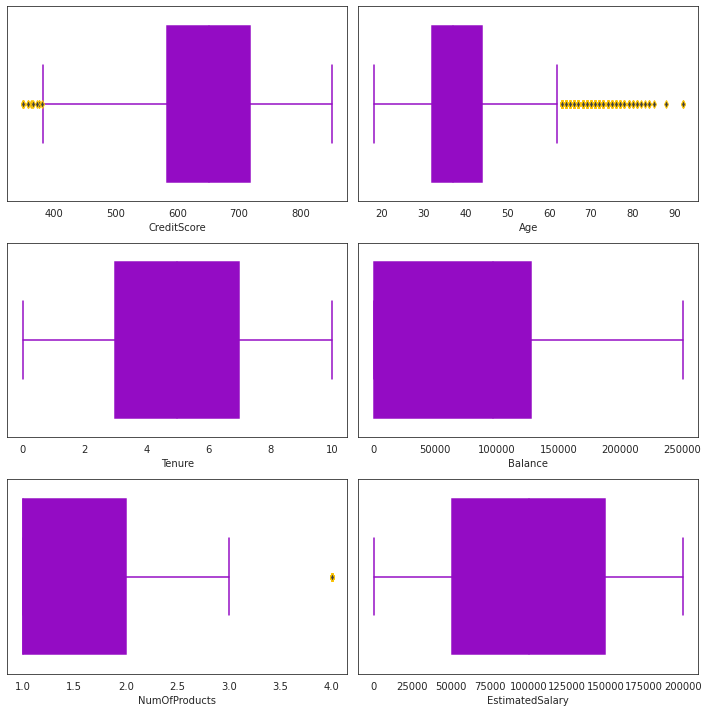

In [14]:
#Create boxplot for distribution of data per each numeric feature
num = ['CreditScore', 'Age','Tenure','Balance', 'NumOfProducts','EstimatedSalary']
fig, axs = plt.subplots(3, 2, figsize=(10,10))
for i, feature in enumerate(num,1):
      plt.subplot(3, 2, i)
      p = sns.boxplot(df[feature], boxprops=dict(facecolor=colors[0], color=colors[0]),
                      capprops=dict(color=colors[0]), whiskerprops=dict(color=colors[0]),
                      flierprops=dict(color=colors[0], markeredgecolor=colors[1]),
                      medianprops=dict(color=colors[0]))
plt.tight_layout()

# Data Preprocessing

In [15]:
#Read five data first
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

### Remove Unnecessary Features

In [17]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### One-Hot Encoding

In [21]:
list_cat = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df2 = pd.get_dummies(df, columns = list_cat, prefix = list_cat)
df2.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,101348.88,1,1,0,0,1,0,1,0,0,0,0,1,0,1
1,608,41,1,83807.86,112542.58,0,0,0,1,1,0,1,0,0,0,1,0,0,1
2,502,42,8,159660.80,113931.57,1,1,0,0,1,0,0,0,1,0,0,1,1,0
3,699,39,1,0.00,93826.63,0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,850,43,2,125510.82,79084.10,0,0,0,1,1,0,1,0,0,0,0,1,0,1


### Feature Scaling

In [22]:
from sklearn.preprocessing import RobustScaler
col = ['CreditScore',	'Age',	'Tenure',	'Balance',	'EstimatedSalary']
scaler = RobustScaler()
df2[col] = scaler.fit_transform(df2[col])
df2.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,-0.246269,0.416667,-0.75,-0.761480,0.011739,1,1,0,0,1,0,1,0,0,0,0,1,0,1
1,-0.328358,0.333333,-1.00,-0.104906,0.125512,0,0,0,1,1,0,1,0,0,0,1,0,0,1
2,-1.119403,0.416667,0.75,0.489346,0.139630,1,1,0,0,1,0,0,0,1,0,0,1,1,0
3,0.350746,0.166667,-1.00,-0.761480,-0.064717,0,1,0,0,1,0,0,1,0,0,1,0,1,0
4,1.477612,0.500000,-0.75,0.221806,-0.214561,0,0,0,1,1,0,1,0,0,0,0,1,0,1


In [23]:
df2.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
EstimatedSalary      float64
Churn                  int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
HasCrCard_0            uint8
HasCrCard_1            uint8
IsActiveMember_0       uint8
IsActiveMember_1       uint8
dtype: object

# Modeling

In [24]:
#Import algoritm library for modeling
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## ML Algoritm Training

In [25]:
#Check type each column
df2.dtypes

CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
EstimatedSalary      float64
Churn                  int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
HasCrCard_0            uint8
HasCrCard_1            uint8
IsActiveMember_0       uint8
IsActiveMember_1       uint8
dtype: object

### Sampling

In [26]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [27]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#Create tuples for y_test y_train
t_split = tuple([y_train.shape, y_test.shape])
t_split

((7000,), (3000,))

Text(0, 0.5, 'Count')

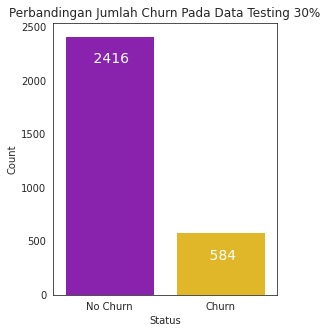

In [29]:
#Create countplot for target label ratio comparison on testing data
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Churn Pada Data Testing 30%', fontsize=12)
total = float(len(y_test))
ax=sns.countplot(x=y_test, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

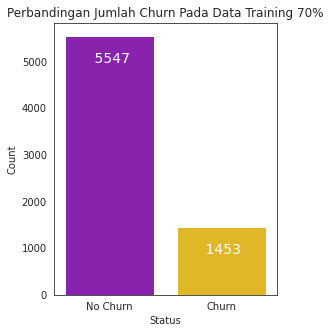

In [30]:
#Create countplot for target label ratio comparison on training data
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Churn Pada Data Training 70%', fontsize=12)
total = float(len(y_train))
ax=sns.countplot(x=y_train, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

In [31]:
#Import matrix evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, f1_score, roc_auc_score
#Create list string model
strmodels=['SVC', 'LogisticRegression',   'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LGBMClassifier',  'GradientBoostingClassifier', 'MLPClassifier', 'XGBClassifier', 'AdaBoostClassifier', 'ExtraTreesClassifier']
#Create list model
models=[SVC(random_state=2022), LogisticRegression(random_state=2022), KNeighborsClassifier(), DecisionTreeClassifier(random_state=2022), RandomForestClassifier(random_state=2022), LGBMClassifier(random_state=2022),  GradientBoostingClassifier(random_state=2022), MLPClassifier(random_state=2022), XGBClassifier(random_state=2022), AdaBoostClassifier(random_state=2022), ExtraTreesClassifier(random_state=2022)]

#Create method for model evaluation 
def metrics(strmodel, model, actuals, predictions):    
    accuracy= round(accuracy_score(actuals, predictions)*100, 2)
    precision= round(precision_score(actuals, predictions)*100, 2)
    recall= round(recall_score(actuals, predictions)*100, 2)
    f1score= round(f1_score(actuals, predictions)*100, 2)
    auc= round(roc_auc_score(actuals, predictions)*100, 2)
    strmodel=strmodel
    
    print("Model: {}".format(strmodel))
    print("Confusion Matrix")
    print(confusion_matrix(actuals, predictions))
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1score))
    print("AUC: {:.2f}".format(auc))
    print()
    
    return strmodel,accuracy,precision,recall,f1score,auc
    

Model: SVC
Confusion Matrix
[[2366   50]
 [ 355  229]]
Accuracy: 86.50
Precision: 82.08
Recall: 39.21
F1-score: 53.07
AUC: 68.57

Model: LogisticRegression
Confusion Matrix
[[2325   91]
 [ 369  215]]
Accuracy: 84.67
Precision: 70.26
Recall: 36.82
F1-score: 48.31
AUC: 66.52

Model: KNeighborsClassifier
Confusion Matrix
[[2278  138]
 [ 366  218]]
Accuracy: 83.20
Precision: 61.24
Recall: 37.33
F1-score: 46.38
AUC: 65.81

Model: DecisionTreeClassifier
Confusion Matrix
[[2121  295]
 [ 276  308]]
Accuracy: 80.97
Precision: 51.08
Recall: 52.74
F1-score: 51.90
AUC: 70.26

Model: RandomForestClassifier
Confusion Matrix
[[2332   84]
 [ 304  280]]
Accuracy: 87.07
Precision: 76.92
Recall: 47.95
F1-score: 59.07
AUC: 72.23

Model: LGBMClassifier
Confusion Matrix
[[2315  101]
 [ 292  292]]
Accuracy: 86.90
Precision: 74.30
Recall: 50.00
F1-score: 59.77
AUC: 72.91

Model: GradientBoostingClassifier
Confusion Matrix
[[2333   83]
 [ 304  280]]
Accuracy: 87.10
Precision: 77.13
Recall: 47.95
F1-score: 59.1

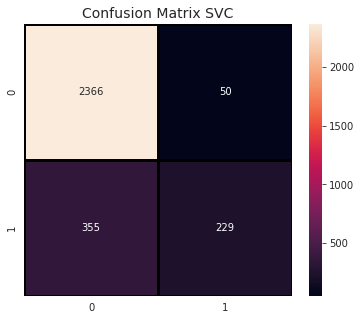

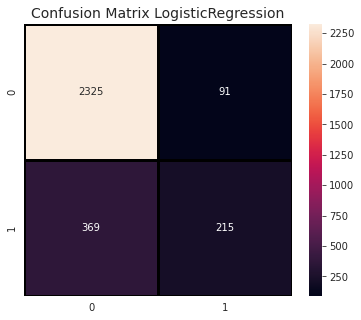

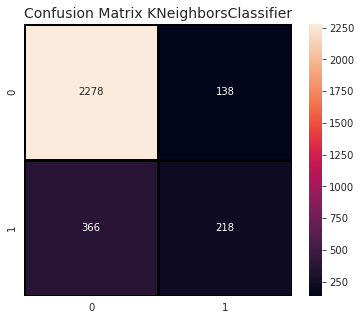

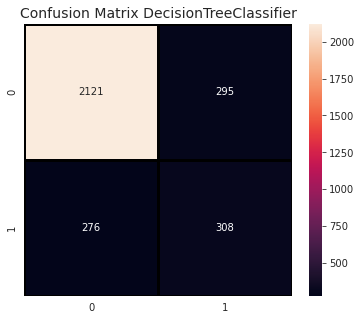

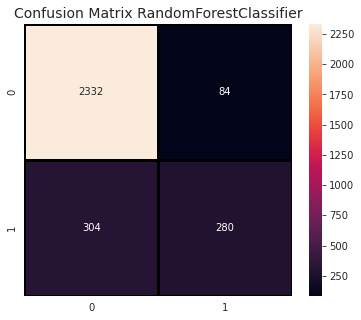

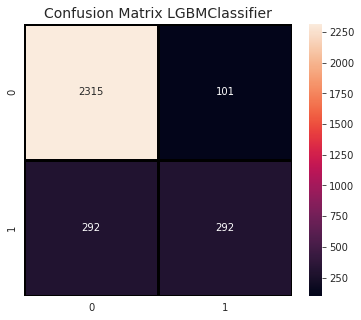

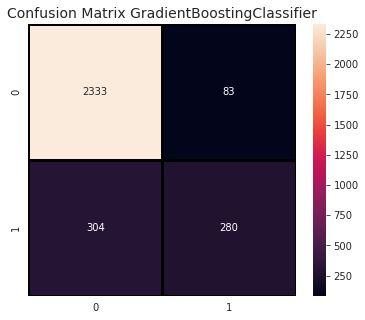

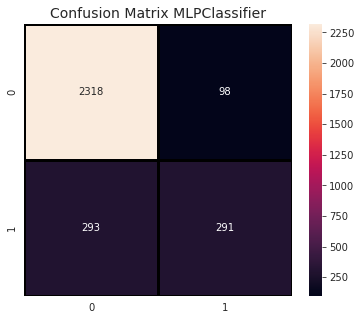

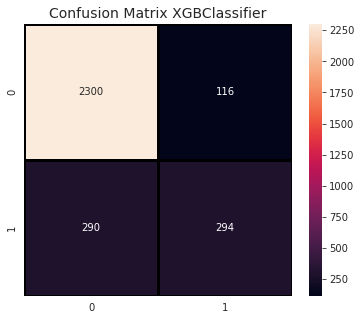

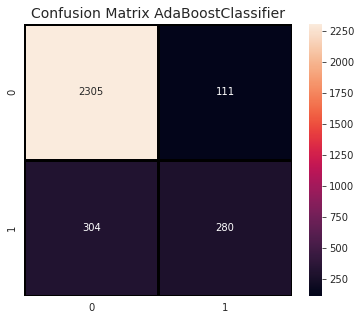

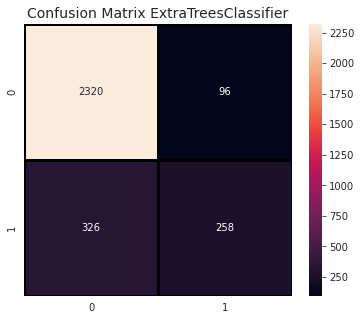

In [32]:
#Start time
start_time = time.time()

#Create an empty list for data without resampling
tanpaRes=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train, y_train)
    #Create predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    tanpaRes+=[tuple(['Tanpa Resampling'])+metrics(strmodel, model, y_test, y_pred.round())]
    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### Random Under Sampler

In [33]:
#Train Random under sample the minority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=2022)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

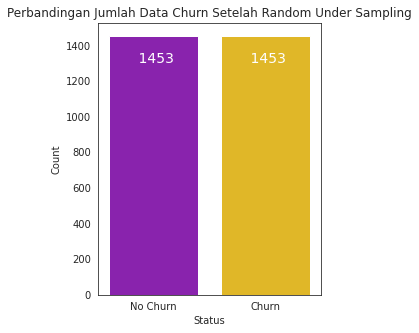

In [34]:
#Create a countplot to compare the ratio of target labels to random over sampling
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah Random Under Sampling', fontsize=12)
total = float(len(y_train_rus))
ax=sns.countplot(x=y_train_rus, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1890  526]
 [ 142  442]]
Accuracy: 77.73
Precision: 45.66
Recall: 75.68
F1-score: 56.96
AUC: 76.96

Model: LogisticRegression
Confusion Matrix
[[1852  564]
 [ 147  437]]
Accuracy: 76.30
Precision: 43.66
Recall: 74.83
F1-score: 55.14
AUC: 75.74

Model: KNeighborsClassifier
Confusion Matrix
[[1815  601]
 [ 162  422]]
Accuracy: 74.57
Precision: 41.25
Recall: 72.26
F1-score: 52.52
AUC: 73.69

Model: DecisionTreeClassifier
Confusion Matrix
[[1635  781]
 [ 176  408]]
Accuracy: 68.10
Precision: 34.31
Recall: 69.86
F1-score: 46.02
AUC: 68.77

Model: RandomForestClassifier
Confusion Matrix
[[1863  553]
 [ 149  435]]
Accuracy: 76.60
Precision: 44.03
Recall: 74.49
F1-score: 55.34
AUC: 75.80

Model: LGBMClassifier
Confusion Matrix
[[1889  527]
 [ 134  450]]
Accuracy: 77.97
Precision: 46.06
Recall: 77.05
F1-score: 57.66
AUC: 77.62

Model: GradientBoostingClassifier
Confusion Matrix
[[1916  500]
 [ 128  456]]
Accuracy: 79.07
Precision: 47.70
Recall: 78.08
F1-score: 59.2

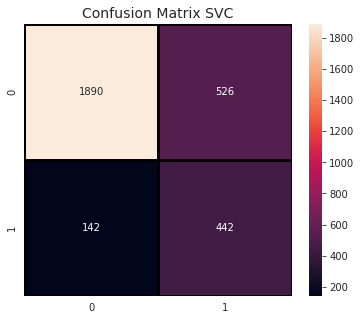

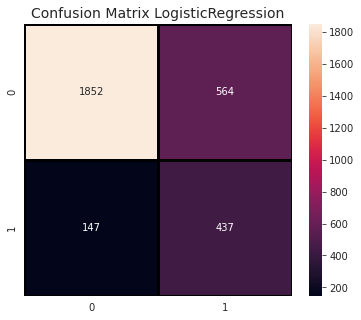

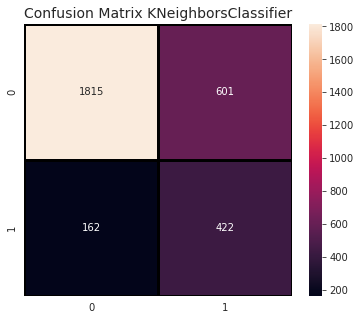

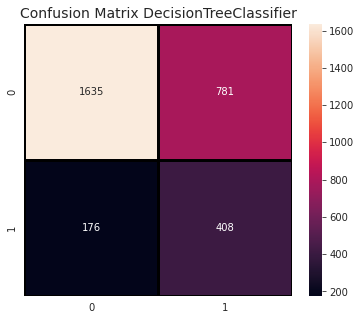

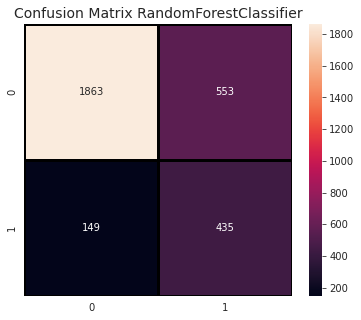

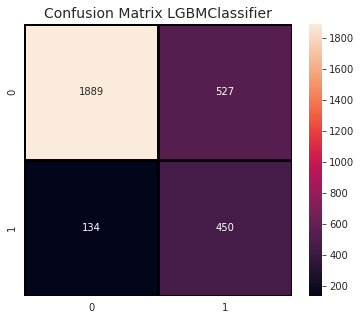

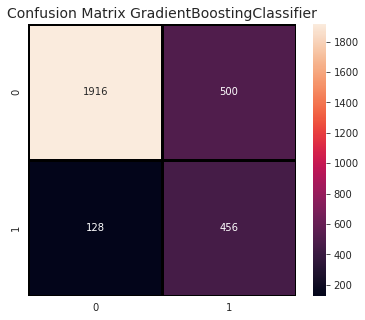

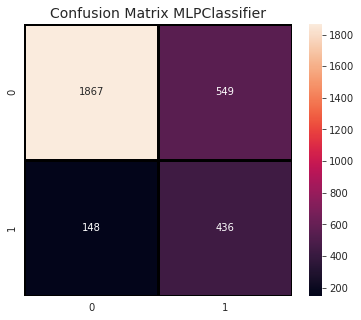

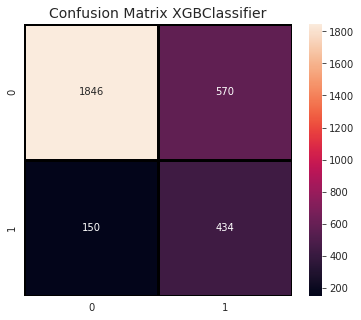

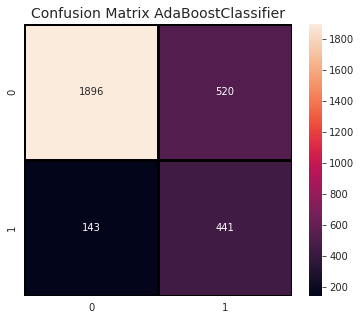

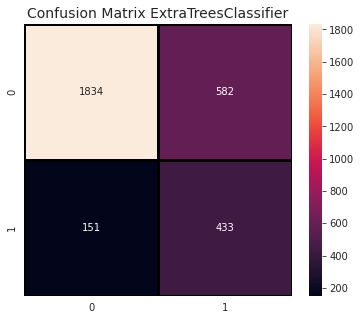

In [35]:
#Start time
start_time = time.time()

#Create an empty list for data with random under sampling
teknikRandUndSm=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_rus, y_train_rus)
    #Create predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikRandUndSm+=[tuple(['Random Under Sampler'])+metrics(strmodel, model, y_test, y_pred.round())]

    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### ClusterCentroids

In [36]:
#Train cluster centroids the minority class
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=2022)
X_train_cc, y_train_cc = cc.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

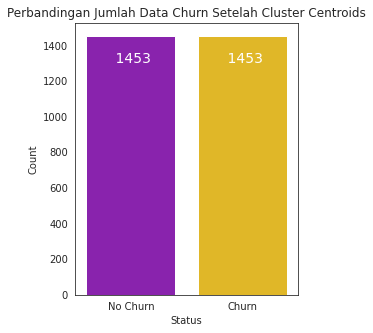

In [37]:
#Create a countplot to compare the ratio of target labels to cluster centroids
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah Cluster Centroids', fontsize=12)
total = float(len(y_train_cc))
ax=sns.countplot(x=y_train_cc, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1787  629]
 [ 123  461]]
Accuracy: 74.93
Precision: 42.29
Recall: 78.94
F1-score: 55.08
AUC: 76.45

Model: LogisticRegression
Confusion Matrix
[[1710  706]
 [ 132  452]]
Accuracy: 72.07
Precision: 39.03
Recall: 77.40
F1-score: 51.89
AUC: 74.09

Model: KNeighborsClassifier
Confusion Matrix
[[1748  668]
 [ 154  430]]
Accuracy: 72.60
Precision: 39.16
Recall: 73.63
F1-score: 51.13
AUC: 72.99

Model: DecisionTreeClassifier
Confusion Matrix
[[1531  885]
 [ 156  428]]
Accuracy: 65.30
Precision: 32.60
Recall: 73.29
F1-score: 45.12
AUC: 68.33

Model: RandomForestClassifier
Confusion Matrix
[[1802  614]
 [ 134  450]]
Accuracy: 75.07
Precision: 42.29
Recall: 77.05
F1-score: 54.61
AUC: 75.82

Model: LGBMClassifier
Confusion Matrix
[[1206 1210]
 [  68  516]]
Accuracy: 57.40
Precision: 29.90
Recall: 88.36
F1-score: 44.68
AUC: 69.14

Model: GradientBoostingClassifier
Confusion Matrix
[[1629  787]
 [ 101  483]]
Accuracy: 70.40
Precision: 38.03
Recall: 82.71
F1-score: 52.1

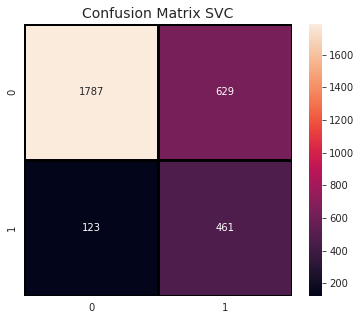

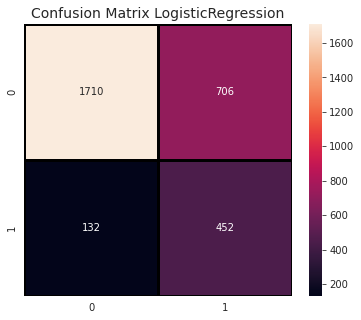

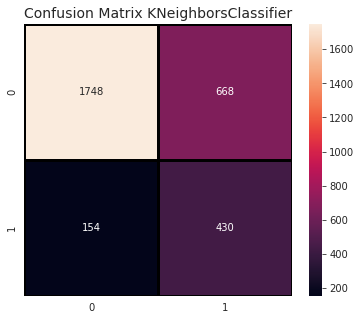

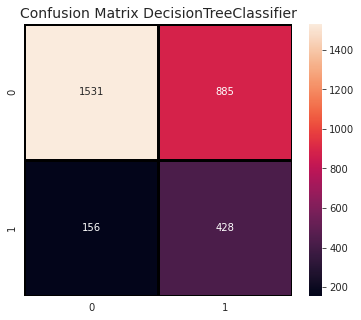

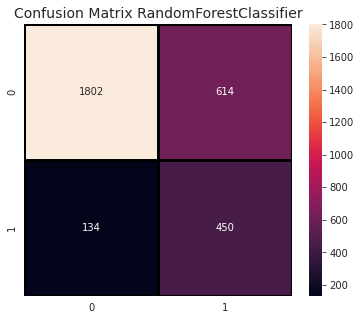

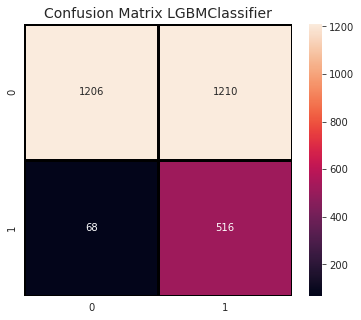

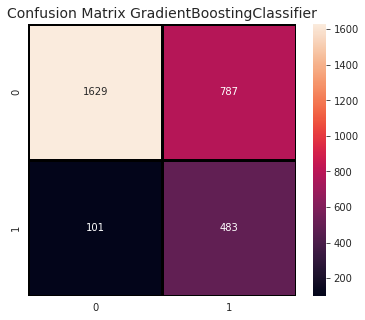

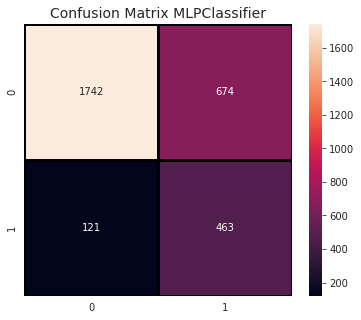

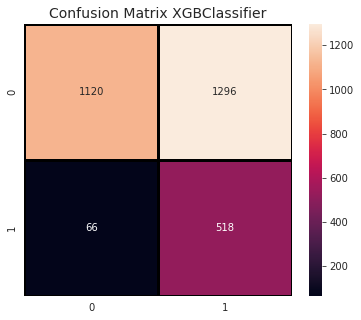

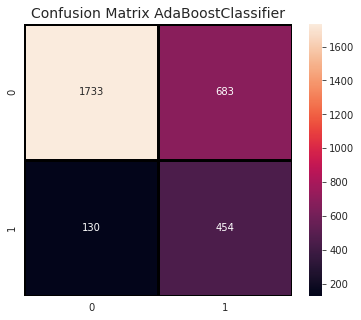

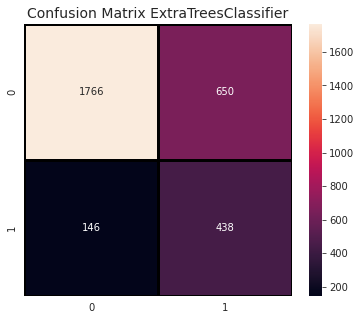

In [38]:
#Start time
start_time = time.time()

#Create an empty list for data with cluster centroids
teknikClusterCentroids=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_cc, y_train_cc)
    #Make predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikClusterCentroids+=[tuple(['Cluster Centroids'])+metrics(strmodel, model, y_test, y_pred.round())]

    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### RandomOverSampler

In [39]:
#Train Random over sample the minority class
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2022)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

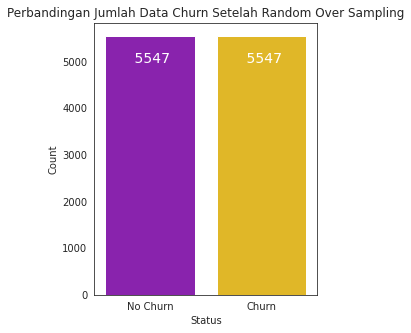

In [40]:
#Create a countplot to compare the ratio of target labels to random over samplingsns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah Random Over Sampling', fontsize=12)
total = float(len(y_train_ros))
ax=sns.countplot(x=y_train_ros, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1932  484]
 [ 157  427]]
Accuracy: 78.63
Precision: 46.87
Recall: 73.12
F1-score: 57.12
AUC: 76.54

Model: LogisticRegression
Confusion Matrix
[[1875  541]
 [ 149  435]]
Accuracy: 77.00
Precision: 44.57
Recall: 74.49
F1-score: 55.77
AUC: 76.05

Model: KNeighborsClassifier
Confusion Matrix
[[1820  596]
 [ 205  379]]
Accuracy: 73.30
Precision: 38.87
Recall: 64.90
F1-score: 48.62
AUC: 70.11

Model: DecisionTreeClassifier
Confusion Matrix
[[2094  322]
 [ 307  277]]
Accuracy: 79.03
Precision: 46.24
Recall: 47.43
F1-score: 46.83
AUC: 67.05

Model: RandomForestClassifier
Confusion Matrix
[[2245  171]
 [ 261  323]]
Accuracy: 85.60
Precision: 65.38
Recall: 55.31
F1-score: 59.93
AUC: 74.12

Model: LGBMClassifier
Confusion Matrix
[[2068  348]
 [ 166  418]]
Accuracy: 82.87
Precision: 54.57
Recall: 71.58
F1-score: 61.93
AUC: 78.59

Model: GradientBoostingClassifier
Confusion Matrix
[[1974  442]
 [ 138  446]]
Accuracy: 80.67
Precision: 50.23
Recall: 76.37
F1-score: 60.6

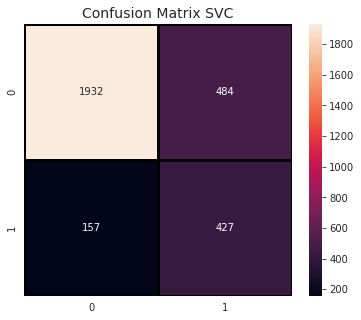

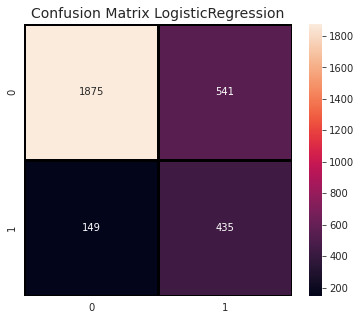

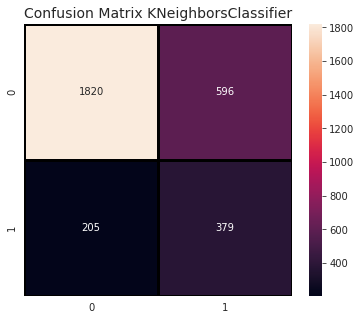

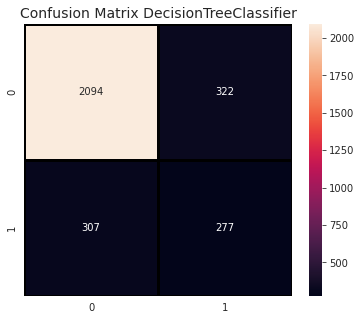

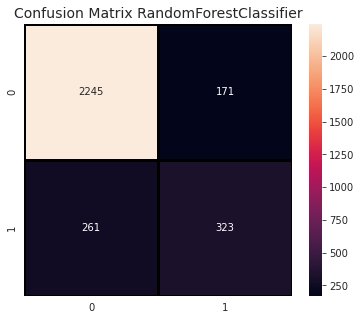

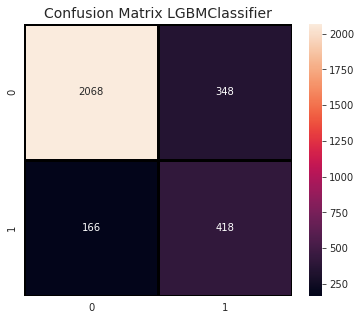

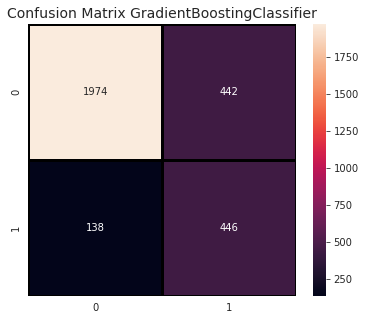

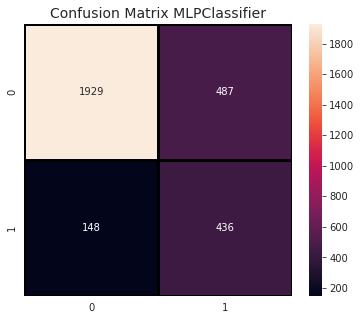

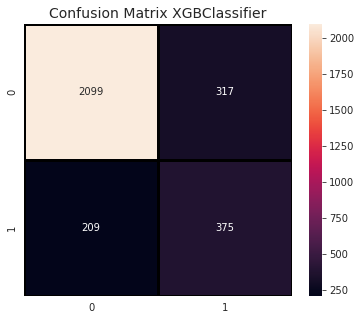

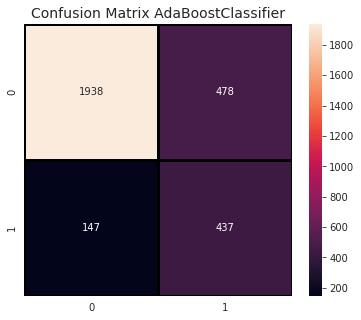

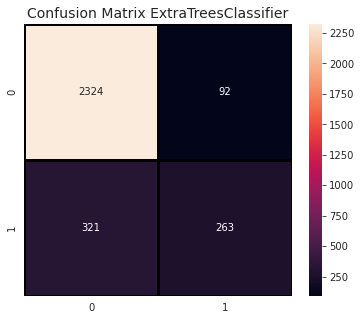

In [41]:
#Start time
start_time = time.time()

#Create an empty list for data with random over sampling
teknikRandOvrSm=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_ros, y_train_ros)
    #Create predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikRandOvrSm+=[tuple(['Random Over Sampler'])+metrics(strmodel, model, y_test, y_pred.round())]
    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### SMOTE

In [42]:
#Train SMOTE the minority class
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2022)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

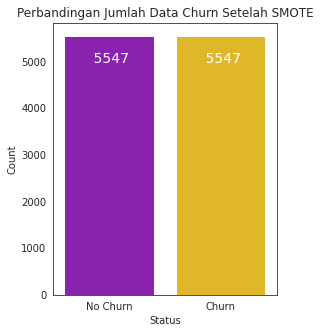

In [43]:
#Create a countplot to compare the ratio of target labels to SMOTE
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah SMOTE', fontsize=12)
total = float(len(y_train_sm))
ax=sns.countplot(x=y_train_sm, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1977  439]
 [ 181  403]]
Accuracy: 79.33
Precision: 47.86
Recall: 69.01
F1-score: 56.52
AUC: 75.42

Model: LogisticRegression
Confusion Matrix
[[1931  485]
 [ 158  426]]
Accuracy: 78.57
Precision: 46.76
Recall: 72.95
F1-score: 56.99
AUC: 76.44

Model: KNeighborsClassifier
Confusion Matrix
[[1900  516]
 [ 219  365]]
Accuracy: 75.50
Precision: 41.43
Recall: 62.50
F1-score: 49.83
AUC: 70.57

Model: DecisionTreeClassifier
Confusion Matrix
[[1995  421]
 [ 290  294]]
Accuracy: 76.30
Precision: 41.12
Recall: 50.34
F1-score: 45.27
AUC: 66.46

Model: RandomForestClassifier
Confusion Matrix
[[2160  256]
 [ 235  349]]
Accuracy: 83.63
Precision: 57.69
Recall: 59.76
F1-score: 58.70
AUC: 74.58

Model: LGBMClassifier
Confusion Matrix
[[2266  150]
 [ 263  321]]
Accuracy: 86.23
Precision: 68.15
Recall: 54.97
F1-score: 60.85
AUC: 74.38

Model: GradientBoostingClassifier
Confusion Matrix
[[2141  275]
 [ 198  386]]
Accuracy: 84.23
Precision: 58.40
Recall: 66.10
F1-score: 62.0

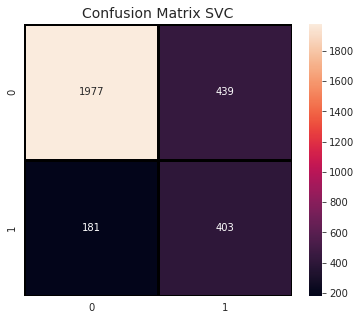

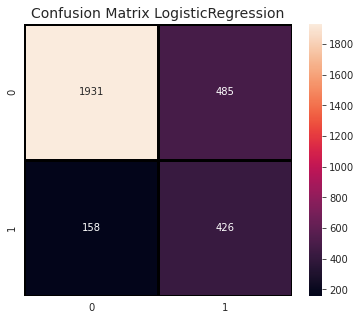

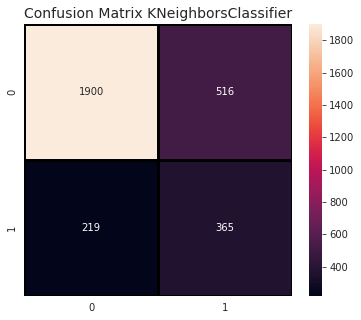

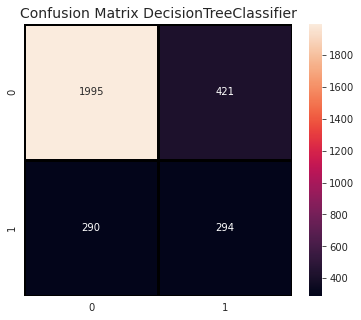

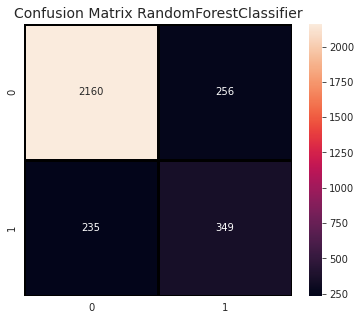

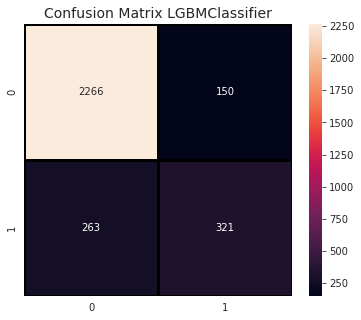

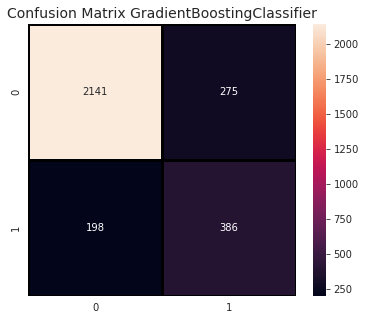

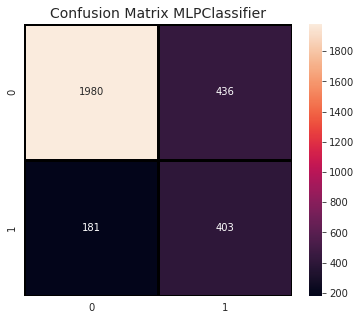

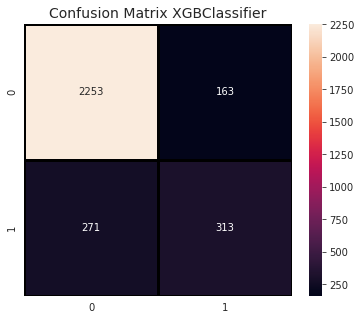

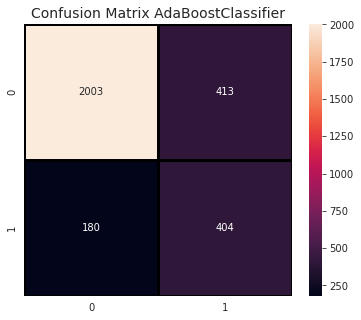

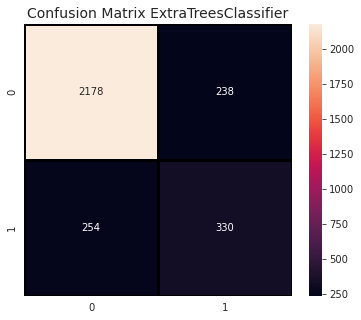

In [44]:
#Start time
start_time = time.time()

#Create an empty list for data with SMOTE
teknikSMOTE=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_sm, y_train_sm)
    #Create predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikSMOTE+=[tuple(['SMOTE'])+metrics(strmodel, model, y_test, y_pred.round())]
    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### ADASYN

In [45]:
#Train adasyn the minority class
from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=2022)
X_train_adasyn, y_train_adasyn = ad.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

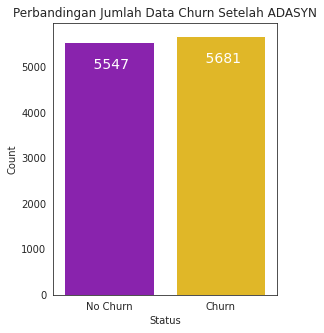

In [46]:
#Create a countplot to compare the ratio of target labels to adasyn
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah ADASYN', fontsize=12)
total = float(len(y_train_adasyn))
ax=sns.countplot(x=y_train_adasyn, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1842  574]
 [ 153  431]]
Accuracy: 75.77
Precision: 42.89
Recall: 73.80
F1-score: 54.25
AUC: 75.02

Model: LogisticRegression
Confusion Matrix
[[1861  555]
 [ 147  437]]
Accuracy: 76.60
Precision: 44.05
Recall: 74.83
F1-score: 55.46
AUC: 75.93

Model: KNeighborsClassifier
Confusion Matrix
[[1810  606]
 [ 191  393]]
Accuracy: 73.43
Precision: 39.34
Recall: 67.29
F1-score: 49.65
AUC: 71.11

Model: DecisionTreeClassifier
Confusion Matrix
[[2028  388]
 [ 269  315]]
Accuracy: 78.10
Precision: 44.81
Recall: 53.94
F1-score: 48.95
AUC: 68.94

Model: RandomForestClassifier
Confusion Matrix
[[2092  324]
 [ 221  363]]
Accuracy: 81.83
Precision: 52.84
Recall: 62.16
F1-score: 57.12
AUC: 74.37

Model: LGBMClassifier
Confusion Matrix
[[2264  152]
 [ 259  325]]
Accuracy: 86.30
Precision: 68.13
Recall: 55.65
F1-score: 61.26
AUC: 74.68

Model: GradientBoostingClassifier
Confusion Matrix
[[2088  328]
 [ 192  392]]
Accuracy: 82.67
Precision: 54.44
Recall: 67.12
F1-score: 60.1

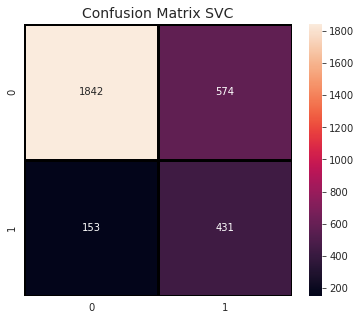

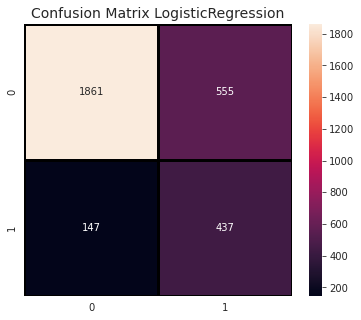

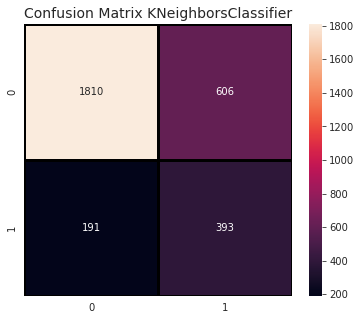

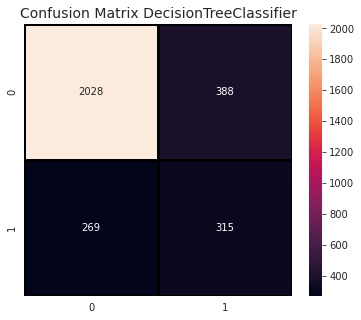

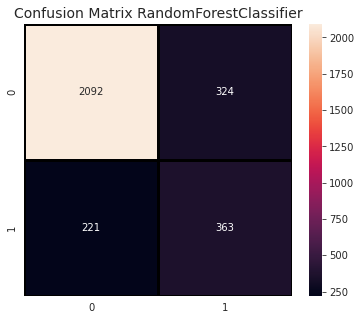

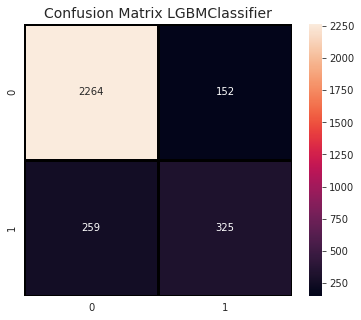

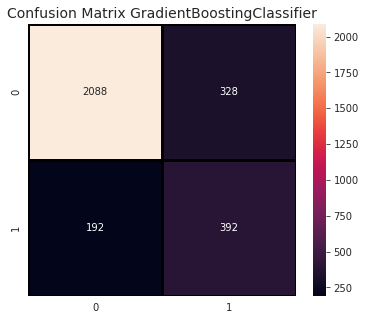

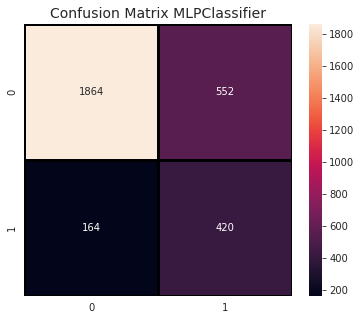

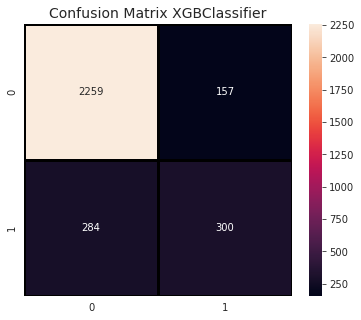

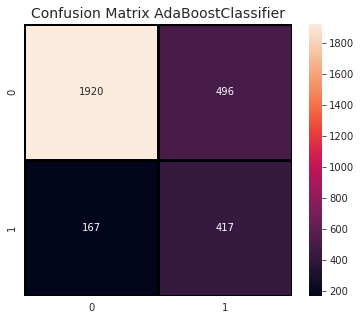

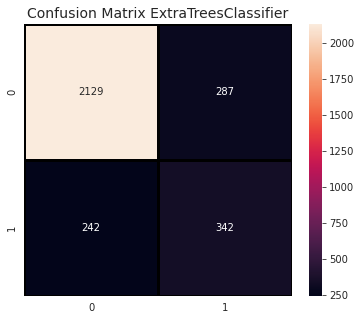

In [47]:
#Start time
start_time = time.time()

#Create an empty list for data with adasyn
teknikADASYN=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_adasyn, y_train_adasyn)
    #Train all models
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikADASYN+=[tuple(['ADASYN'])+metrics(strmodel, model, y_test, y_pred.round())]
    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### SMOTEENN

In [48]:
#Train SMOTEENN the minority class
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=2022)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

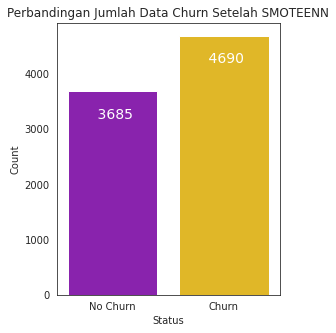

In [49]:
#Create a countplot to compare the ratio of target labels to SMOTEENN
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah SMOTEENN', fontsize=12)
total = float(len(y_train_smoteenn))
ax=sns.countplot(x=y_train_smoteenn, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1803  613]
 [ 137  447]]
Accuracy: 75.00
Precision: 42.17
Recall: 76.54
F1-score: 54.38
AUC: 75.58

Model: LogisticRegression
Confusion Matrix
[[1733  683]
 [ 123  461]]
Accuracy: 73.13
Precision: 40.30
Recall: 78.94
F1-score: 53.36
AUC: 75.33

Model: KNeighborsClassifier
Confusion Matrix
[[1763  653]
 [ 159  425]]
Accuracy: 72.93
Precision: 39.42
Recall: 72.77
F1-score: 51.14
AUC: 72.87

Model: DecisionTreeClassifier
Confusion Matrix
[[1856  560]
 [ 189  395]]
Accuracy: 75.03
Precision: 41.36
Recall: 67.64
F1-score: 51.33
AUC: 72.23

Model: RandomForestClassifier
Confusion Matrix
[[1931  485]
 [ 159  425]]
Accuracy: 78.53
Precision: 46.70
Recall: 72.77
F1-score: 56.89
AUC: 76.35

Model: LGBMClassifier
Confusion Matrix
[[2017  399]
 [ 170  414]]
Accuracy: 81.03
Precision: 50.92
Recall: 70.89
F1-score: 59.27
AUC: 77.19

Model: GradientBoostingClassifier
Confusion Matrix
[[1863  553]
 [ 134  450]]
Accuracy: 77.10
Precision: 44.87
Recall: 77.05
F1-score: 56.7

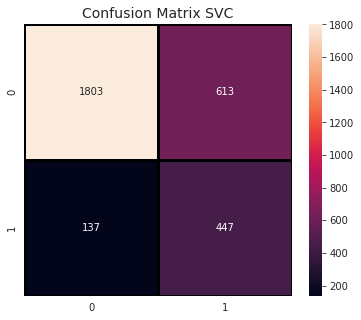

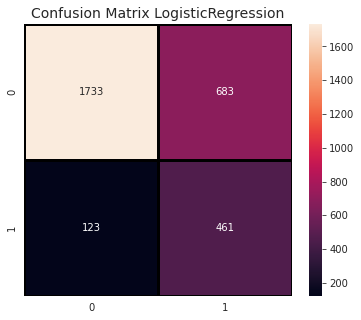

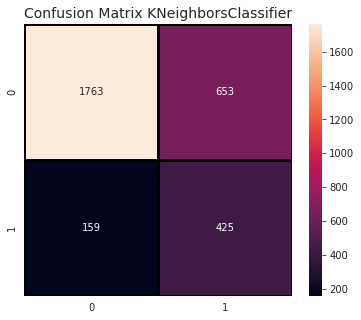

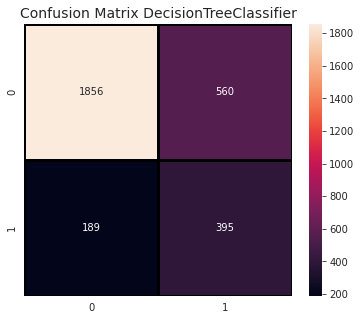

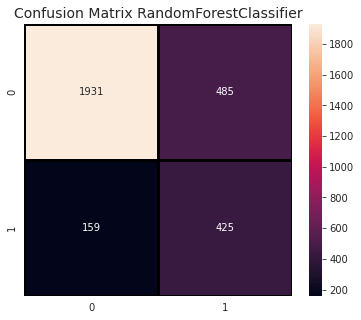

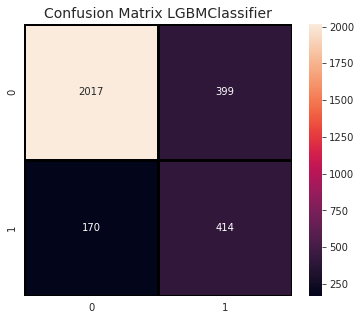

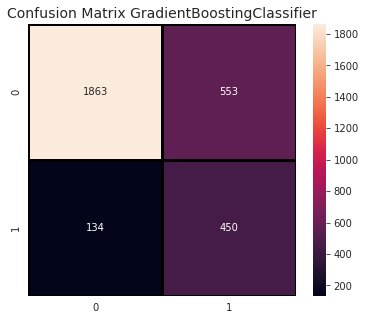

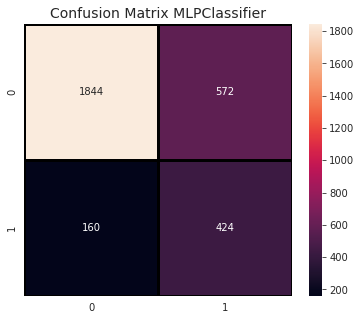

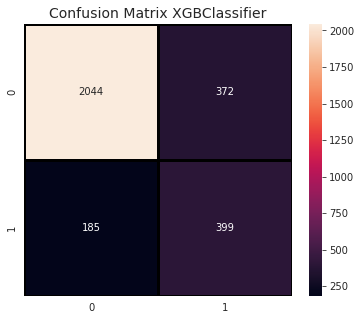

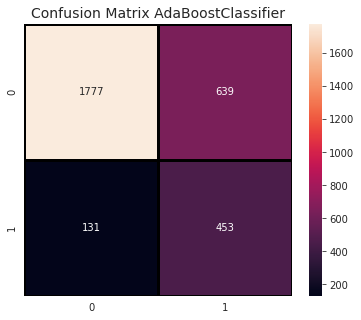

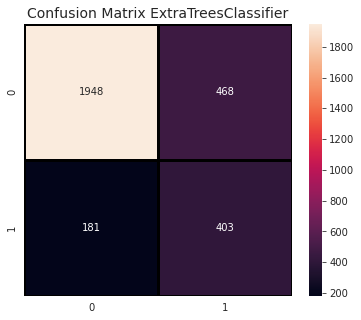

In [50]:
#Start time
start_time = time.time()

#Create an empty list for data with SMOTEENN
teknikSMOTEENN=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_smoteenn, y_train_smoteenn)
    #Create predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikSMOTEENN+=[tuple(['SMOTEENN'])+metrics(strmodel, model, y_test, y_pred.round())]
    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

### SMOTETomek

In [51]:
#Train SMOTETomek the minority class
from imblearn.combine import SMOTETomek
smtom = SMOTETomek(random_state=2022)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

Text(0, 0.5, 'Count')

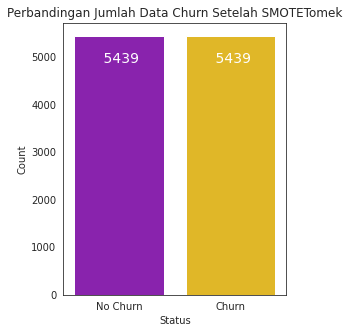

In [52]:
#Create a countplot to compare the ratio of target labels to SMOTETomek
sns.set_style('white')
plt.figure(figsize=(4, 5))
plt.title('Perbandingan Jumlah Data Churn Setelah SMOTETomek', fontsize=12)
total = float(len(y_train_smtom))
ax=sns.countplot(x=y_train_smtom, palette=colors);
for p in ax.patches:
    ax.annotate(f'\n           {p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=14)
ax.set_xticklabels(['No Churn', 'Churn'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Model: SVC
Confusion Matrix
[[1984  432]
 [ 183  401]]
Accuracy: 79.50
Precision: 48.14
Recall: 68.66
F1-score: 56.60
AUC: 75.39

Model: LogisticRegression
Confusion Matrix
[[1933  483]
 [ 159  425]]
Accuracy: 78.60
Precision: 46.81
Recall: 72.77
F1-score: 56.97
AUC: 76.39

Model: KNeighborsClassifier
Confusion Matrix
[[1893  523]
 [ 219  365]]
Accuracy: 75.27
Precision: 41.10
Recall: 62.50
F1-score: 49.59
AUC: 70.43

Model: DecisionTreeClassifier
Confusion Matrix
[[1995  421]
 [ 280  304]]
Accuracy: 76.63
Precision: 41.93
Recall: 52.05
F1-score: 46.45
AUC: 67.31

Model: RandomForestClassifier
Confusion Matrix
[[2141  275]
 [ 225  359]]
Accuracy: 83.33
Precision: 56.62
Recall: 61.47
F1-score: 58.95
AUC: 75.05

Model: LGBMClassifier
Confusion Matrix
[[2252  164]
 [ 249  335]]
Accuracy: 86.23
Precision: 67.13
Recall: 57.36
F1-score: 61.87
AUC: 75.29

Model: GradientBoostingClassifier
Confusion Matrix
[[2130  286]
 [ 195  389]]
Accuracy: 83.97
Precision: 57.63
Recall: 66.61
F1-score: 61.8

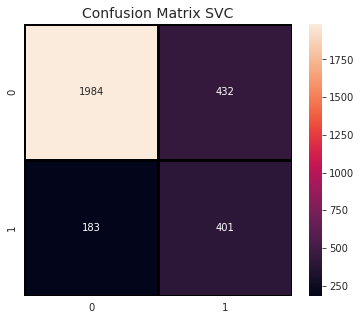

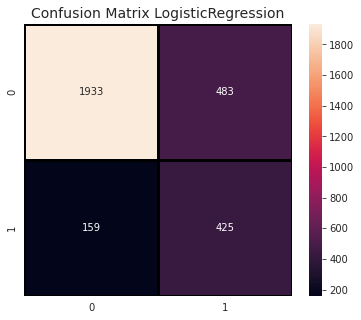

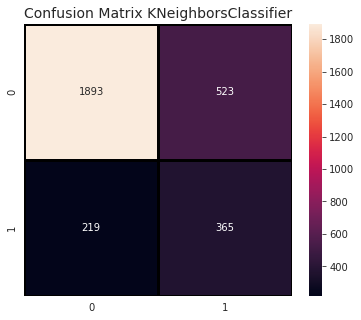

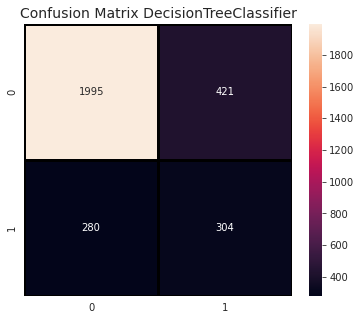

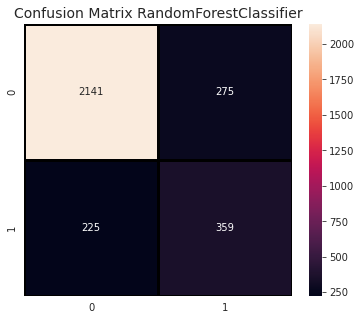

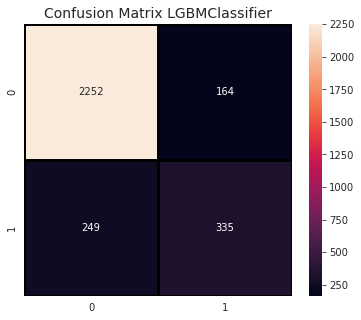

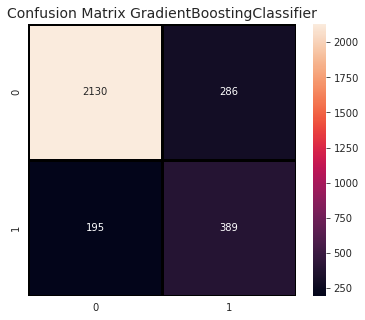

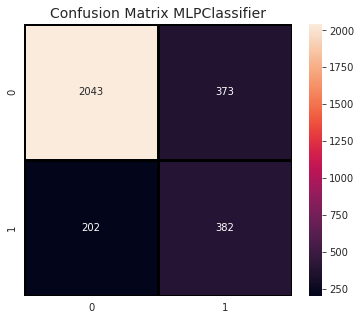

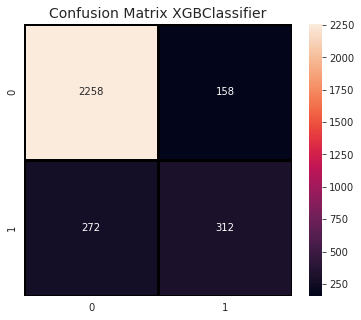

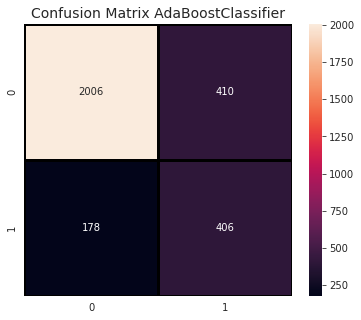

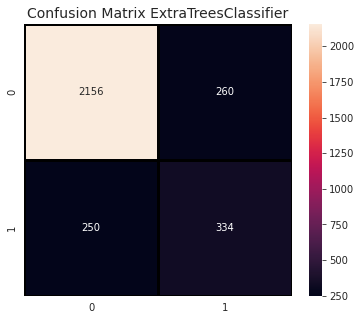

In [53]:
#Start time
start_time = time.time()

#Create an empty list for data with SMOTETomek
teknikSMOTETTomek=[]
for i, strmodel in enumerate(strmodels):
    model=models[i]
    #Train all models
    model.fit(X_train_smtom, y_train_smtom)
    #Create predictions on test data 
    y_pred = model.predict(X_test)
    #Insert tuple result model evaluation to list
    teknikSMOTETTomek+=[tuple(['SMOTETTomek'])+metrics(strmodel, model, y_test, y_pred.round())]
    #Create heatmap confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
    plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
    
#Execution time
print("Time: %s seconds" % (time.time() - start_time))

In [54]:
#Create dataframe for all technique resampling
tanpaRes=pd.DataFrame(tanpaRes)
teknikRandUndSm=pd.DataFrame(teknikRandUndSm)
teknikClusterCentroids=pd.DataFrame(teknikClusterCentroids)
teknikRandOvrSm=pd.DataFrame(teknikRandOvrSm)
teknikSMOTE=pd.DataFrame(teknikSMOTE)
teknikADASYN=pd.DataFrame(teknikADASYN)
teknikSMOTEENN=pd.DataFrame(teknikSMOTEENN)
teknikSMOTETTomek=pd.DataFrame(teknikSMOTETTomek)

In [55]:
results=pd.concat([tanpaRes, teknikRandUndSm, teknikClusterCentroids, teknikRandOvrSm, teknikSMOTE, teknikADASYN, teknikSMOTEENN, teknikSMOTETTomek],axis=0)
results.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']

result = results.sort_values('Recall',ascending=False).reset_index(drop=True)
result.head(50)

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,Cluster Centroids,XGBClassifier,54.60,28.56,88.70,43.20,67.53
1,Cluster Centroids,LGBMClassifier,57.40,29.90,88.36,44.68,69.14
2,Cluster Centroids,GradientBoostingClassifier,70.40,38.03,82.71,52.10,75.07
3,Cluster Centroids,MLPClassifier,73.50,40.72,79.28,53.81,75.69
4,Cluster Centroids,SVC,74.93,42.29,78.94,55.08,76.45
5,SMOTEENN,LogisticRegression,73.13,40.30,78.94,53.36,75.33
6,Random Under Sampler,GradientBoostingClassifier,79.07,47.70,78.08,59.22,78.69
7,Cluster Centroids,AdaBoostClassifier,72.90,39.93,77.74,52.76,74.73
8,SMOTEENN,AdaBoostClassifier,74.33,41.48,77.57,54.06,75.56
9,Cluster Centroids,LogisticRegression,72.07,39.03,77.40,51.89,74.09


In [56]:
result.tail(50)

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
38,Random Over Sampler,LGBMClassifier,82.87,54.57,71.58,61.93,78.59
39,ADASYN,AdaBoostClassifier,77.90,45.67,71.40,55.71,75.44
40,SMOTEENN,LGBMClassifier,81.03,50.92,70.89,59.27,77.19
41,Random Under Sampler,DecisionTreeClassifier,68.10,34.31,69.86,46.02,68.77
42,SMOTETTomek,AdaBoostClassifier,80.40,49.75,69.52,58.00,76.28
43,SMOTE,AdaBoostClassifier,80.23,49.45,69.18,57.67,76.04
44,SMOTE,MLPClassifier,79.43,48.03,69.01,56.64,75.48
45,SMOTE,SVC,79.33,47.86,69.01,56.52,75.42
46,SMOTEENN,ExtraTreesClassifier,78.37,46.27,69.01,55.40,74.82
47,SMOTETTomek,SVC,79.50,48.14,68.66,56.60,75.39


In [57]:
r_tanpaRes = tanpaRes.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_tanpaRes = tanpaRes.reset_index(drop=True)
r_tanpaRes

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,Tanpa Resampling,SVC,86.50,82.08,39.21,53.07,68.57
1,Tanpa Resampling,LogisticRegression,84.67,70.26,36.82,48.31,66.52
2,Tanpa Resampling,KNeighborsClassifier,83.20,61.24,37.33,46.38,65.81
3,Tanpa Resampling,DecisionTreeClassifier,80.97,51.08,52.74,51.90,70.26
4,Tanpa Resampling,RandomForestClassifier,87.07,76.92,47.95,59.07,72.23
5,Tanpa Resampling,LGBMClassifier,86.90,74.30,50.00,59.77,72.91
6,Tanpa Resampling,GradientBoostingClassifier,87.10,77.13,47.95,59.13,72.25
7,Tanpa Resampling,MLPClassifier,86.97,74.81,49.83,59.82,72.89
8,Tanpa Resampling,XGBClassifier,86.47,71.71,50.34,59.15,72.77
9,Tanpa Resampling,AdaBoostClassifier,86.17,71.61,47.95,57.44,71.68


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Tanpa Resampling')

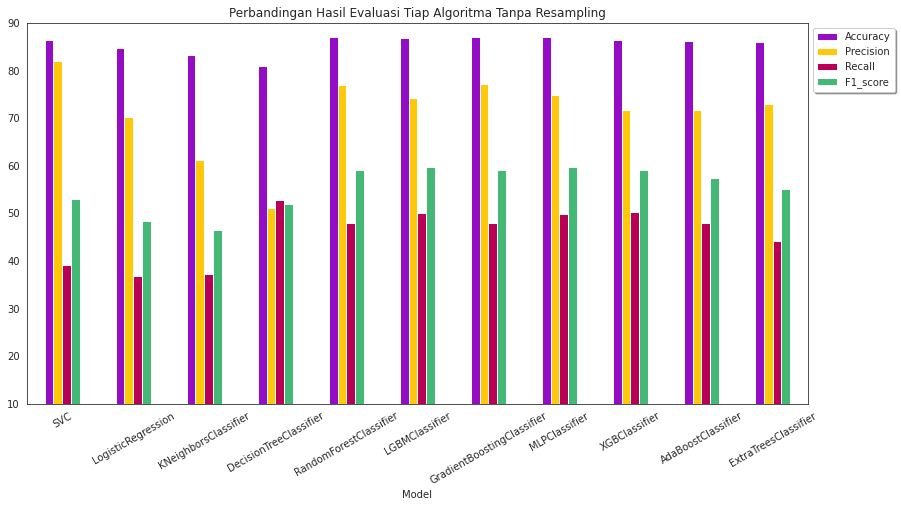

In [58]:
r_tanpaRes[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors,  figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Tanpa Resampling")

In [59]:
r_teknikRandUndSm = teknikRandUndSm.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikRandUndSm = teknikRandUndSm.reset_index(drop=True)
r_teknikRandUndSm

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,Random Under Sampler,SVC,77.73,45.66,75.68,56.96,76.96
1,Random Under Sampler,LogisticRegression,76.30,43.66,74.83,55.14,75.74
2,Random Under Sampler,KNeighborsClassifier,74.57,41.25,72.26,52.52,73.69
3,Random Under Sampler,DecisionTreeClassifier,68.10,34.31,69.86,46.02,68.77
4,Random Under Sampler,RandomForestClassifier,76.60,44.03,74.49,55.34,75.80
5,Random Under Sampler,LGBMClassifier,77.97,46.06,77.05,57.66,77.62
6,Random Under Sampler,GradientBoostingClassifier,79.07,47.70,78.08,59.22,78.69
7,Random Under Sampler,MLPClassifier,76.77,44.26,74.66,55.58,75.97
8,Random Under Sampler,XGBClassifier,76.00,43.23,74.32,54.66,75.36
9,Random Under Sampler,AdaBoostClassifier,77.90,45.89,75.51,57.09,77.00


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan Random Under Sampling')

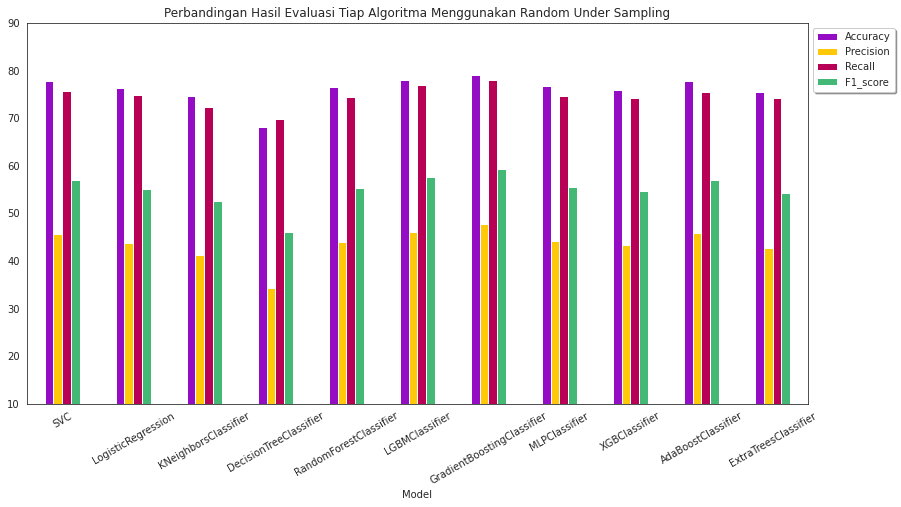

In [60]:
r_teknikRandUndSm[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors,  figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan Random Under Sampling")

In [61]:
r_teknikClusterCentroids = teknikClusterCentroids.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikClusterCentroids = teknikClusterCentroids.reset_index(drop=True)
r_teknikClusterCentroids

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,Cluster Centroids,SVC,74.93,42.29,78.94,55.08,76.45
1,Cluster Centroids,LogisticRegression,72.07,39.03,77.40,51.89,74.09
2,Cluster Centroids,KNeighborsClassifier,72.60,39.16,73.63,51.13,72.99
3,Cluster Centroids,DecisionTreeClassifier,65.30,32.60,73.29,45.12,68.33
4,Cluster Centroids,RandomForestClassifier,75.07,42.29,77.05,54.61,75.82
5,Cluster Centroids,LGBMClassifier,57.40,29.90,88.36,44.68,69.14
6,Cluster Centroids,GradientBoostingClassifier,70.40,38.03,82.71,52.10,75.07
7,Cluster Centroids,MLPClassifier,73.50,40.72,79.28,53.81,75.69
8,Cluster Centroids,XGBClassifier,54.60,28.56,88.70,43.20,67.53
9,Cluster Centroids,AdaBoostClassifier,72.90,39.93,77.74,52.76,74.73


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan Cluster Centroids')

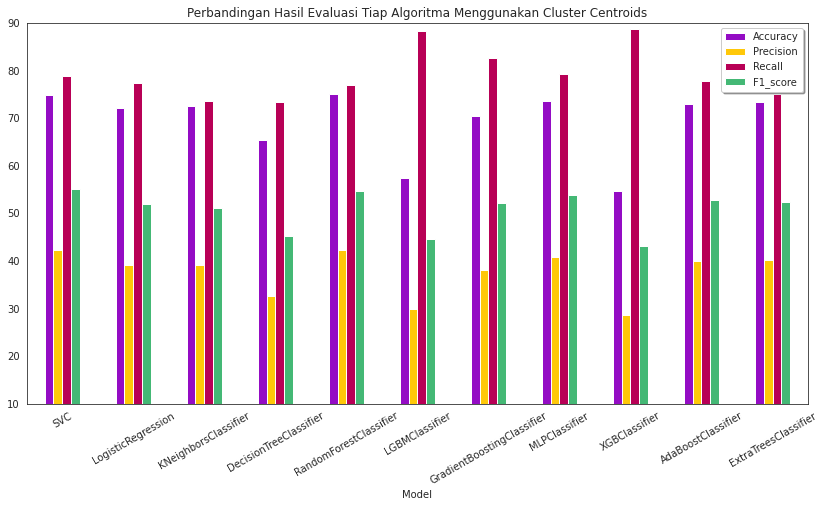

In [62]:
r_teknikClusterCentroids[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors,  figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan Cluster Centroids")

In [63]:
r_teknikRandOvrSm = teknikRandOvrSm.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikRandOvrSm = teknikRandOvrSm.reset_index(drop=True)
r_teknikRandOvrSm

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,Random Over Sampler,SVC,78.63,46.87,73.12,57.12,76.54
1,Random Over Sampler,LogisticRegression,77.00,44.57,74.49,55.77,76.05
2,Random Over Sampler,KNeighborsClassifier,73.30,38.87,64.90,48.62,70.11
3,Random Over Sampler,DecisionTreeClassifier,79.03,46.24,47.43,46.83,67.05
4,Random Over Sampler,RandomForestClassifier,85.60,65.38,55.31,59.93,74.12
5,Random Over Sampler,LGBMClassifier,82.87,54.57,71.58,61.93,78.59
6,Random Over Sampler,GradientBoostingClassifier,80.67,50.23,76.37,60.60,79.04
7,Random Over Sampler,MLPClassifier,78.83,47.24,74.66,57.86,77.25
8,Random Over Sampler,XGBClassifier,82.47,54.19,64.21,58.78,75.55
9,Random Over Sampler,AdaBoostClassifier,79.17,47.76,74.83,58.31,77.52


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan Random Over Sampling')

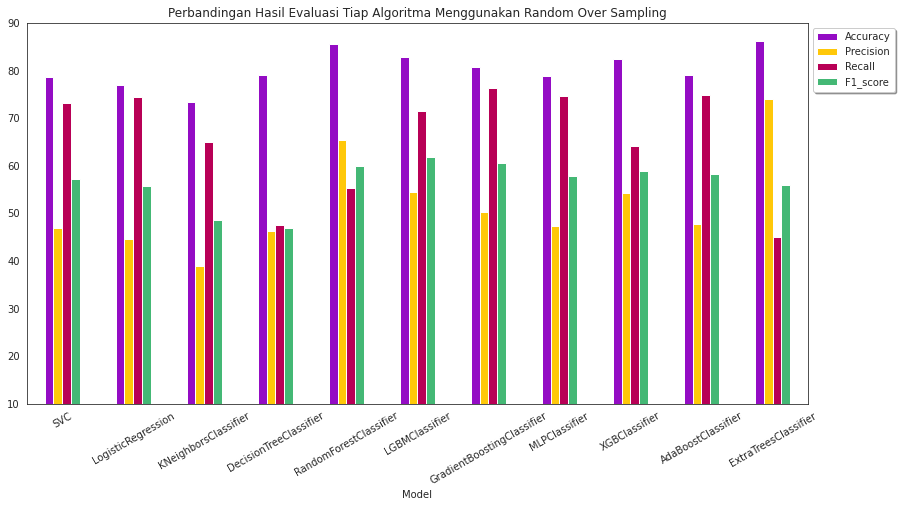

In [64]:
r_teknikRandOvrSm[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors, figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan Random Over Sampling")

In [65]:
r_teknikSMOTE  = teknikSMOTE.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikSMOTE  = teknikSMOTE.reset_index(drop=True)
r_teknikSMOTE

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,SMOTE,SVC,79.33,47.86,69.01,56.52,75.42
1,SMOTE,LogisticRegression,78.57,46.76,72.95,56.99,76.44
2,SMOTE,KNeighborsClassifier,75.50,41.43,62.50,49.83,70.57
3,SMOTE,DecisionTreeClassifier,76.30,41.12,50.34,45.27,66.46
4,SMOTE,RandomForestClassifier,83.63,57.69,59.76,58.70,74.58
5,SMOTE,LGBMClassifier,86.23,68.15,54.97,60.85,74.38
6,SMOTE,GradientBoostingClassifier,84.23,58.40,66.10,62.01,77.36
7,SMOTE,MLPClassifier,79.43,48.03,69.01,56.64,75.48
8,SMOTE,XGBClassifier,85.53,65.76,53.60,59.06,73.42
9,SMOTE,AdaBoostClassifier,80.23,49.45,69.18,57.67,76.04


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan SMOTE')

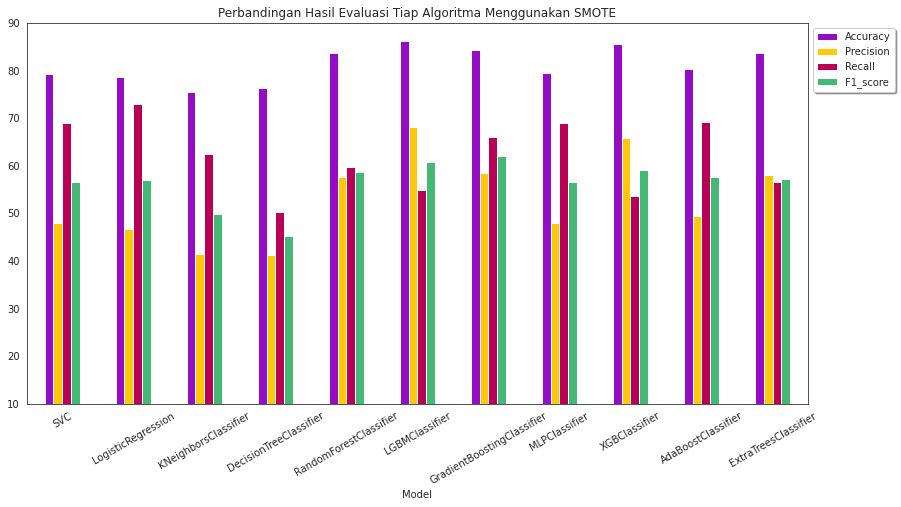

In [66]:
r_teknikSMOTE[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors, figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan SMOTE")

In [67]:
r_teknikADASYN  = teknikADASYN.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikADASYN  = teknikADASYN.reset_index(drop=True)
r_teknikADASYN 

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,ADASYN,SVC,75.77,42.89,73.80,54.25,75.02
1,ADASYN,LogisticRegression,76.60,44.05,74.83,55.46,75.93
2,ADASYN,KNeighborsClassifier,73.43,39.34,67.29,49.65,71.11
3,ADASYN,DecisionTreeClassifier,78.10,44.81,53.94,48.95,68.94
4,ADASYN,RandomForestClassifier,81.83,52.84,62.16,57.12,74.37
5,ADASYN,LGBMClassifier,86.30,68.13,55.65,61.26,74.68
6,ADASYN,GradientBoostingClassifier,82.67,54.44,67.12,60.12,76.77
7,ADASYN,MLPClassifier,76.13,43.21,71.92,53.98,74.54
8,ADASYN,XGBClassifier,85.30,65.65,51.37,57.64,72.44
9,ADASYN,AdaBoostClassifier,77.90,45.67,71.40,55.71,75.44


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan ADASYN')

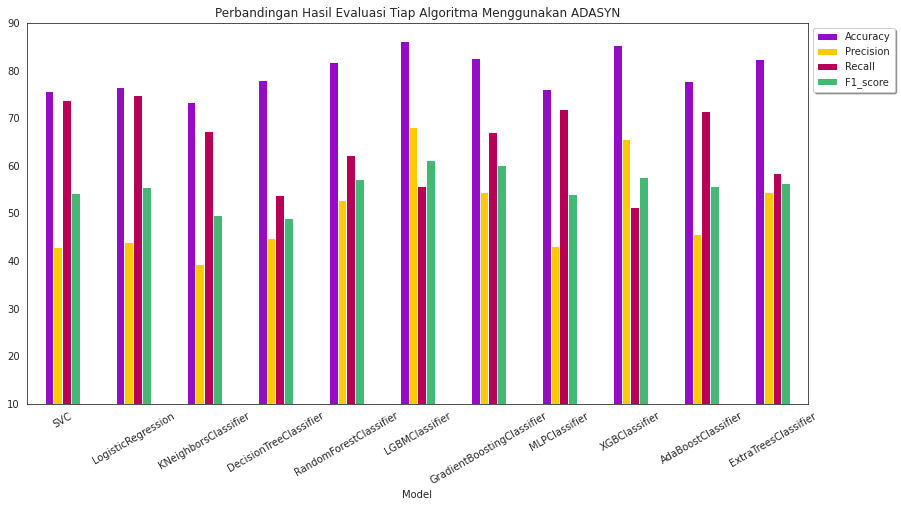

In [68]:
r_teknikADASYN[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors,  figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=True)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan ADASYN")

In [69]:
r_teknikSMOTEENN = teknikSMOTEENN.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikSMOTEENN = teknikSMOTEENN.reset_index(drop=True)
r_teknikSMOTEENN

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,SMOTEENN,SVC,75.00,42.17,76.54,54.38,75.58
1,SMOTEENN,LogisticRegression,73.13,40.30,78.94,53.36,75.33
2,SMOTEENN,KNeighborsClassifier,72.93,39.42,72.77,51.14,72.87
3,SMOTEENN,DecisionTreeClassifier,75.03,41.36,67.64,51.33,72.23
4,SMOTEENN,RandomForestClassifier,78.53,46.70,72.77,56.89,76.35
5,SMOTEENN,LGBMClassifier,81.03,50.92,70.89,59.27,77.19
6,SMOTEENN,GradientBoostingClassifier,77.10,44.87,77.05,56.71,77.08
7,SMOTEENN,MLPClassifier,75.60,42.57,72.60,53.67,74.46
8,SMOTEENN,XGBClassifier,81.43,51.75,68.32,58.89,76.46
9,SMOTEENN,AdaBoostClassifier,74.33,41.48,77.57,54.06,75.56


(10.0, 90.0)

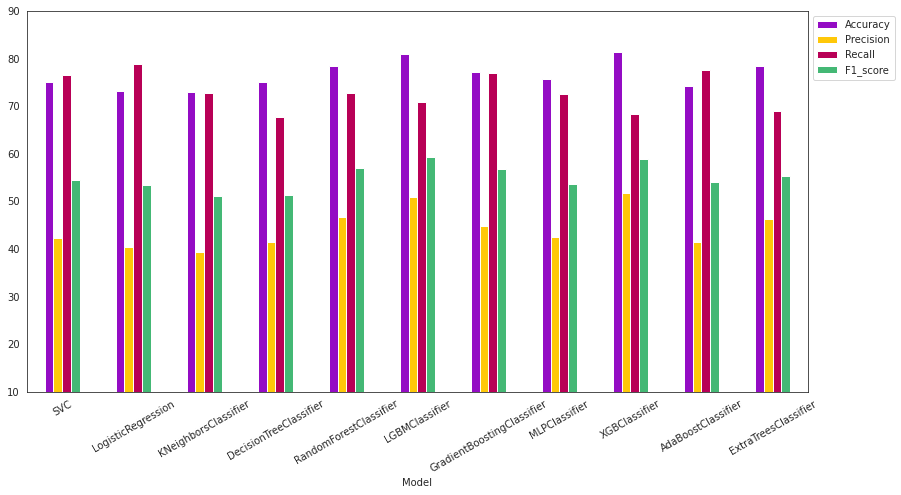

In [70]:
r_teknikSMOTEENN[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors, figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=None)
plt.xticks(rotation=30)
plt.ylim([10, 90])

In [71]:
r_teknikSMOTETTomek = teknikSMOTETTomek.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
r_teknikSMOTETTomek = teknikSMOTETTomek.reset_index(drop=True)
r_teknikSMOTETTomek 

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,SMOTETTomek,SVC,79.50,48.14,68.66,56.60,75.39
1,SMOTETTomek,LogisticRegression,78.60,46.81,72.77,56.97,76.39
2,SMOTETTomek,KNeighborsClassifier,75.27,41.10,62.50,49.59,70.43
3,SMOTETTomek,DecisionTreeClassifier,76.63,41.93,52.05,46.45,67.31
4,SMOTETTomek,RandomForestClassifier,83.33,56.62,61.47,58.95,75.05
5,SMOTETTomek,LGBMClassifier,86.23,67.13,57.36,61.87,75.29
6,SMOTETTomek,GradientBoostingClassifier,83.97,57.63,66.61,61.80,77.39
7,SMOTETTomek,MLPClassifier,80.83,50.60,65.41,57.06,74.99
8,SMOTETTomek,XGBClassifier,85.67,66.38,53.42,59.20,73.44
9,SMOTETTomek,AdaBoostClassifier,80.40,49.75,69.52,58.00,76.28


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan SMOTETomek')

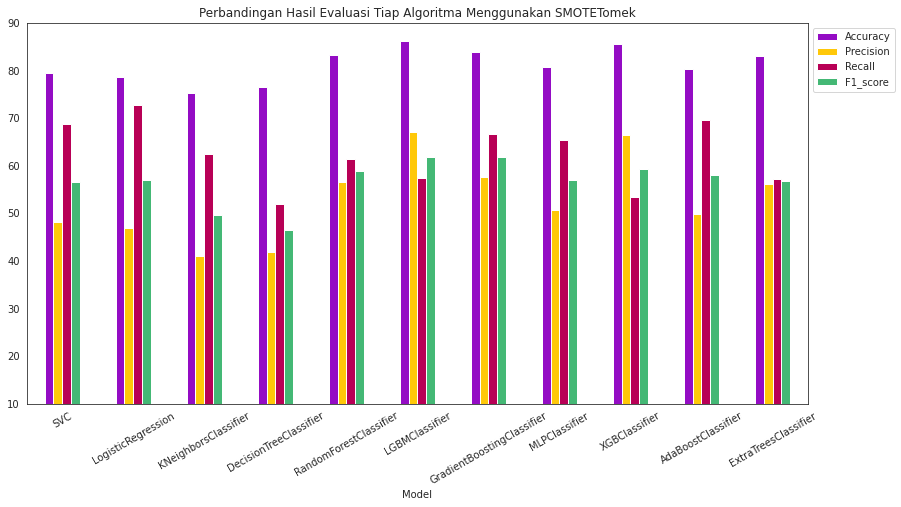

In [72]:
r_teknikSMOTETTomek[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors, figsize=(14, 7))
plt.legend(bbox_to_anchor=(1, 1), shadow=None)
plt.xticks(rotation=30)
plt.ylim([10, 90])
plt.title("Perbandingan Hasil Evaluasi Tiap Algoritma Menggunakan SMOTETomek")

## Visualization AUC

In [73]:
import sklearn.metrics as metrics
def viz_auc(y_test, y_pred, teknik):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr, tpr, label=strmodel+" = {:.2f}".format(auc))
    plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.5)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"Kurva ROC {teknik}",fontsize=14)
    plt.legend(bbox_to_anchor=(1, 1), shadow=True) 

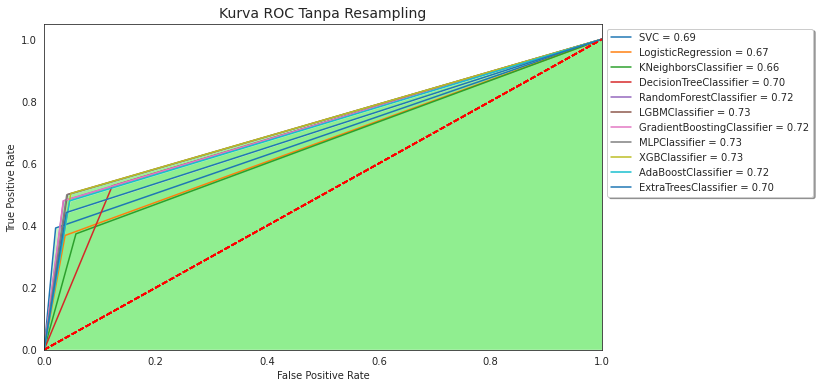

In [74]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'Tanpa Resampling'
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

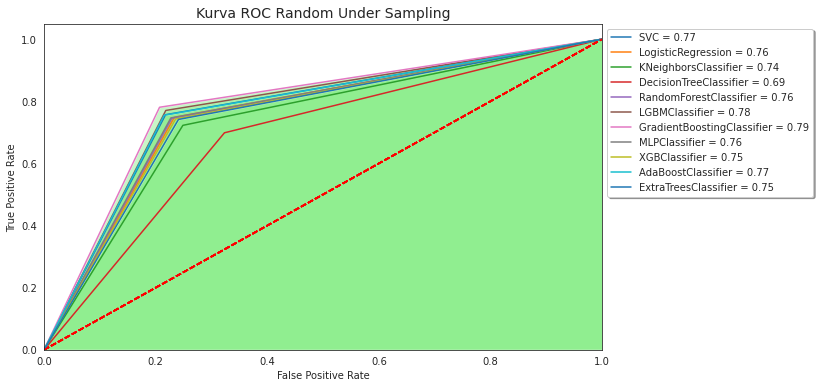

In [75]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'Random Under Sampling'
    model.fit(X_train_rus, y_train_rus)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

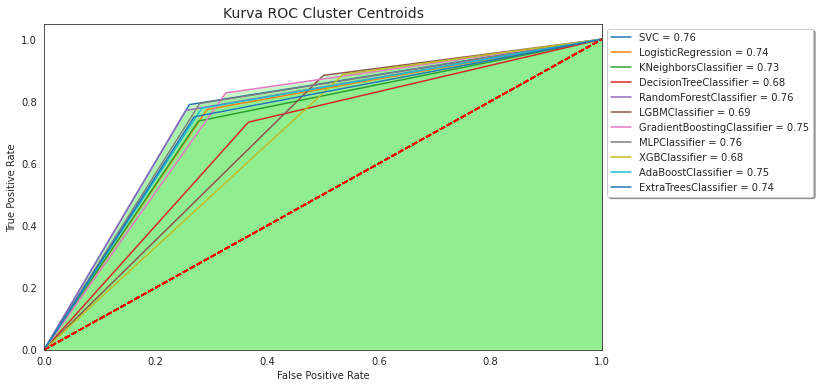

In [76]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'Cluster Centroids'
    model.fit(X_train_cc, y_train_cc)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

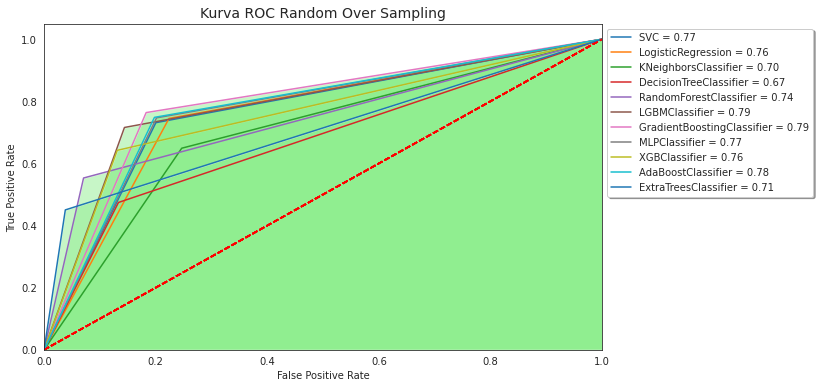

In [77]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'Random Over Sampling'
    model.fit(X_train_ros, y_train_ros)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

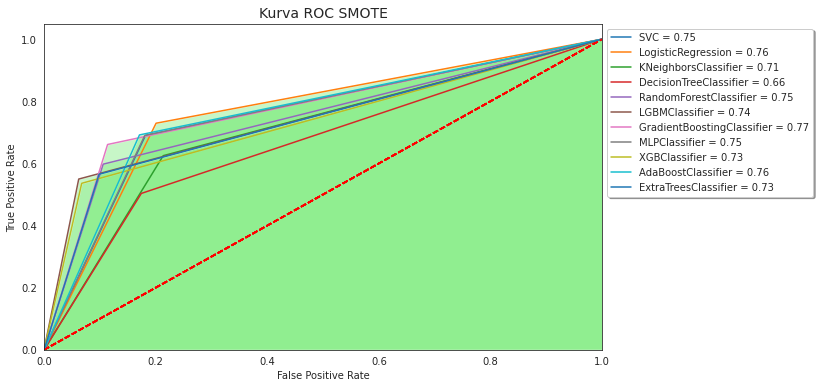

In [78]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'SMOTE'
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

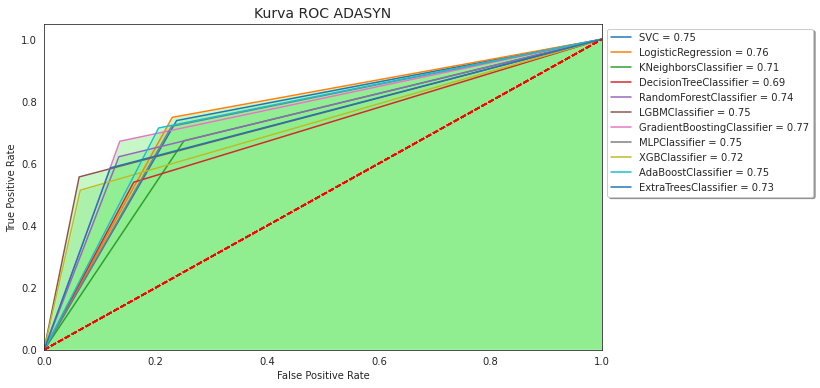

In [79]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'ADASYN'
    model.fit(X_train_adasyn, y_train_adasyn)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

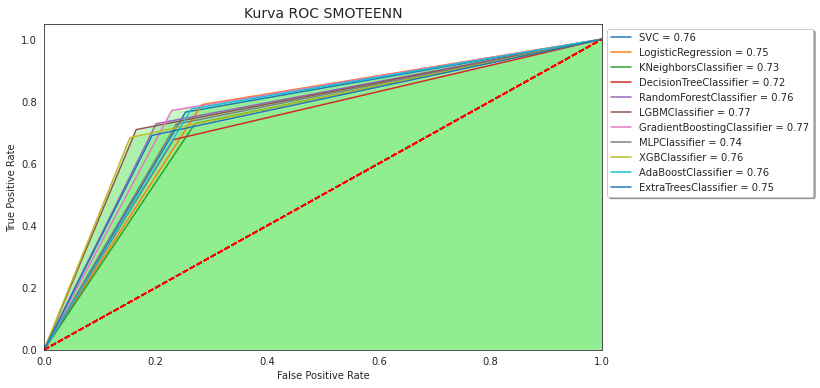

In [80]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'SMOTEENN'
    model.fit(X_train_smoteenn, y_train_smoteenn)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

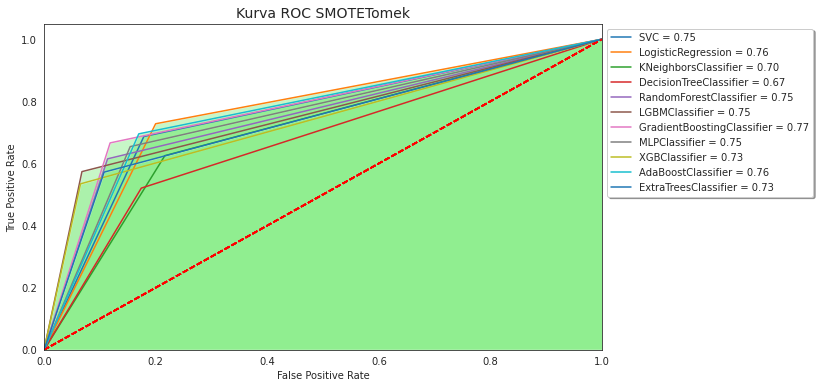

In [81]:
plt.figure(figsize = (10, 6))
for i, strmodel in enumerate(strmodels):
    model=models[i]
    teknik = 'SMOTETomek'
    model.fit(X_train_smtom, y_train_smtom)
    y_pred = model.predict(X_test)
    viz_auc(y_test, y_pred, teknik)

## GridSearch

In [82]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [83]:
def metrics(strmodel, model, actuals, predictions):  
    accuracy= round(accuracy_score(actuals, predictions)*100, 2)
    precision= round(precision_score(actuals, predictions)*100, 2)
    recall= round(recall_score(actuals, predictions)*100, 2)
    f1score= round(f1_score(actuals, predictions)*100, 2)
    auc= round(roc_auc_score(actuals, predictions)*100, 2)
    strmodel=strmodel
    
    print("Model: {}".format(strmodel))
    print("Confusion Matrix")
    print(confusion_matrix(actuals, predictions))
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1score))
    print("AUC: {:.2f}".format(auc))
    print()
    
    return strmodel,accuracy,precision,recall,f1score,auc

### GridSearch XGBClassifier Cluster Centroids

Model: XGBClassifier
Confusion Matrix
[[2300  116]
 [ 290  294]]
Accuracy: 86.47
Precision: 71.71
Recall: 50.34
F1-score: 59.15
AUC: 72.77

Time: 0.9231853485107422 seconds


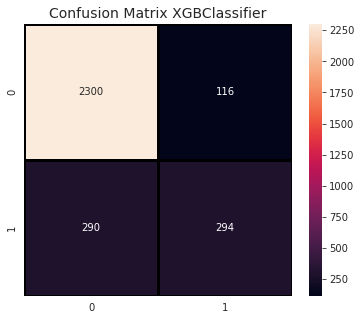

In [84]:
#Start time
start_time = time.time()

#Create an empty list for model XGB
modelXGBC=[]
#Create model
model=XGBClassifier(random_state=2022)
#Train model
model.fit(X_train, y_train)
##Create predictions on test data 
y_pred = model.predict(X_test)
strmodel = f'XGBClassifier'
#Create heatmap confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
#Insert tuple result model evaluation to list
modelXGBC+=[tuple(['Tanpa Resampling'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'XGB Classifier'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

Model: XGBClassifier
Cluster Centroids
Confusion Matrix
[[1120 1296]
 [  66  518]]
Accuracy: 54.60
Precision: 28.56
Recall: 88.70
F1-score: 43.20
AUC: 67.53

Time: 0.65114426612854 seconds


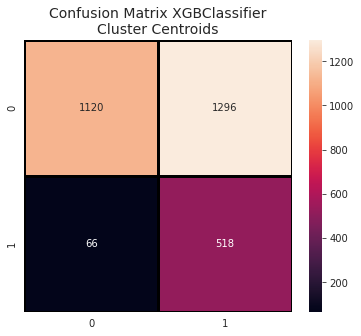

In [85]:
#Start time
start_time = time.time()

#Create model
model=XGBClassifier(random_state=2022)
#Train all models with cluster centroids
model.fit(X_train_cc, y_train_cc)
#Create predictions on test data 
y_pred= model.predict(X_test)
strmodel = f'XGBClassifier\nCluster Centroids'
#Create heatmap confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
#Insert tuple result model evaluation to list
modelXGBC+=[tuple(['Cluster Centroids'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'XGB Classifier Cluster Centroids'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__min_child_weight': 4, 'classifier__n_estimators': 200}
Model: XGBClassifier
Tuning
Cluster Centroids
Confusion Matrix
[[1106 1310]
 [  53  531]]
Accuracy: 54.57
Precision: 28.84
Recall: 90.92
F1-score: 43.79
AUC: 68.35

Time: 853.2205195426941 seconds


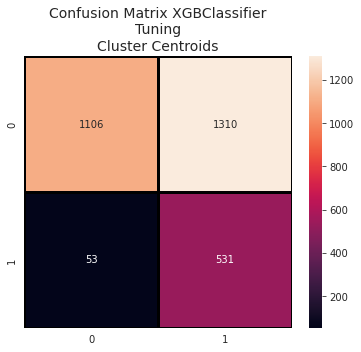

In [86]:
#Start time
start_time = time.time()

pipeline = imbpipeline(steps = [['Cluster Centroids', ClusterCentroids(random_state=11)],
                                ['classifier', XGBClassifier(random_state=2022)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__max_depth': [5,10, 15, 20],
              'classifier__min_child_weight':[4,5,6],
              'classifier__learning_rate': [0.1,0.5,1.0],
              'classifier__n_estimators': [100, 200]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
best_prm = grid_search.best_params_
print(best_prm)
strmodel = f'XGBClassifier\nTuning\nCluster Centroids'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelXGBC+=[tuple(['Cluster Centroids'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'XGB Classifier Tuning Cluster Centroids'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

In [87]:
modelXGBC=pd.DataFrame(modelXGBC)
modelXGBC.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
modelXGBC[['Teknik','Model','Recall']]

,Teknik,Model,Recall
0,Tanpa Resampling,XGBClassifier,50.34
1,Cluster Centroids,XGBClassifier\nCluster Centroids,88.70
2,Cluster Centroids,XGBClassifier\nTuning\nCluster Centroids,90.92


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Recall Pada Algoritma XGB CLassifiern')

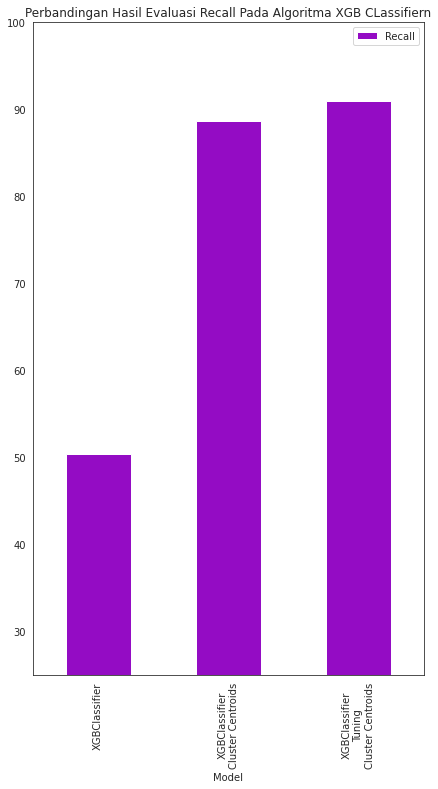

In [88]:
modelXGBC[['Teknik','Model','Recall']].plot(x='Model', kind='bar', color=colors, figsize=(7, 12))
plt.ylim([25, 100])
plt.title("Perbandingan Hasil Evaluasi Recall Pada Algoritma XGB CLassifiern")

### GridSearch LGBM Classifier Cluster Centroids

Model: LGBM Classifier
Confusion Matrix
[[2315  101]
 [ 292  292]]
Accuracy: 86.90
Precision: 74.30
Recall: 50.00
F1-score: 59.77
AUC: 72.91

Time: 0.34400439262390137 seconds


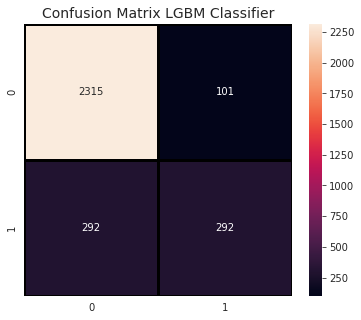

In [89]:
#Start time
start_time = time.time()

modelLGBM=[]
model=LGBMClassifier(random_state=2022)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
strmodel = f'LGBM Classifier'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelLGBM+=[tuple(['Tanpa Resampling'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'LGBMClassifier'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

Model: LGBM Classifier
Cluster Centroids
Confusion Matrix
[[1206 1210]
 [  68  516]]
Accuracy: 57.40
Precision: 29.90
Recall: 88.36
F1-score: 44.68
AUC: 69.14

Time: 0.288219690322876 seconds


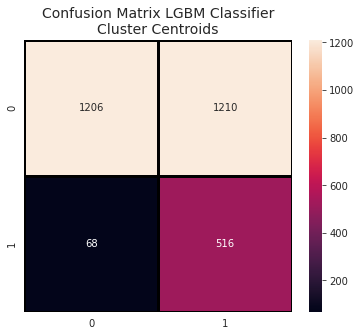

In [90]:
#Start time
start_time = time.time()

model=LGBMClassifier(random_state=2022)
model.fit(X_train_cc, y_train_cc)
y_pred = model.predict(X_test)
strmodel = f'LGBM Classifier\nCluster Centroids'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelLGBM+=[tuple(['Cluster Centroids'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'LGBMClassifier Cluster Centroids'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

{'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 20, 'classifier__n_estimators': 100}
Model: LGBM Classifier
Tuning
Cluster Centroids
Confusion Matrix
[[1097 1319]
 [  52  532]]
Accuracy: 54.30
Precision: 28.74
Recall: 91.10
F1-score: 43.70
AUC: 68.25

Time: 528.9754374027252 seconds


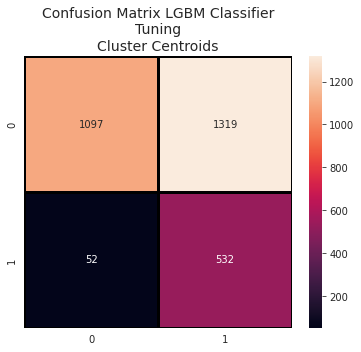

In [91]:
#Start time
start_time = time.time()

pipeline = imbpipeline(steps = [['Cluster Centroids', ClusterCentroids(random_state=2022)],
                                ['classifier', LGBMClassifier(random_state=2022)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=11)
    
param_grid = {'classifier__max_depth':[5,10, 15, 20],
              'classifier__n_estimators':[100, 200],
              'classifier__learning_rate':[0.1,0.5,1.0],
              'classifier__colsample_bytree':[0.8,0.95]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
best_prm = grid_search.best_params_
print(best_prm)
strmodel = f'LGBM Classifier\nTuning\nCluster Centroids'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelLGBM+=[tuple(['Cluster Centroids'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'LGBM Classifier Tuning Cluster Centroids'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

In [92]:
modelLGBM=pd.DataFrame(modelLGBM)
modelLGBM.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
modelLGBM[['Teknik','Model','Recall']]

,Teknik,Model,Recall
0,Tanpa Resampling,LGBM Classifier,50.00
1,Cluster Centroids,LGBM Classifier\nCluster Centroids,88.36
2,Cluster Centroids,LGBM Classifier\nTuning\nCluster Centroids,91.10


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Recall Pada Algoritma LGBM Classifier')

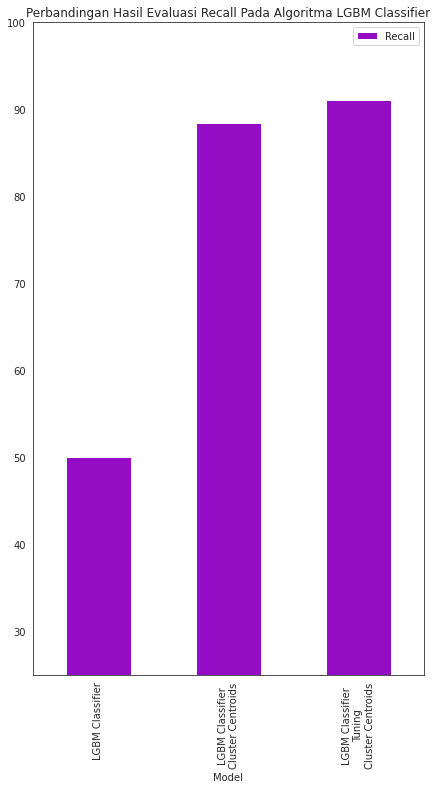

In [93]:
modelLGBM[['Teknik','Model','Recall']].plot(x='Model', kind='bar', color=colors, figsize=(7, 12))
plt.ylim([25, 100])
plt.title("Perbandingan Hasil Evaluasi Recall Pada Algoritma LGBM Classifier")

### GridSearch Gradient Boosting Classifier Cluster Centroids

Model: Gradient Boosting Classifier
Confusion Matrix
[[2333   83]
 [ 304  280]]
Accuracy: 87.10
Precision: 77.13
Recall: 47.95
F1-score: 59.13
AUC: 72.25

Time: 1.2697761058807373 seconds


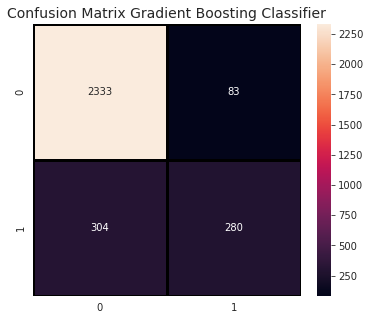

In [94]:
#Start time
start_time = time.time()

modelGBC=[]
model=GradientBoostingClassifier(random_state=2022)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
strmodel = f'Gradient Boosting Classifier'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelGBC+=[tuple(['Tanpa Resampling'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'Gradient Boosting Classifier'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

Model: Gradient Boosting Classifier
Cluster Centroids
Confusion Matrix
[[1629  787]
 [ 101  483]]
Accuracy: 70.40
Precision: 38.03
Recall: 82.71
F1-score: 52.10
AUC: 75.07

Time: 0.7012789249420166 seconds


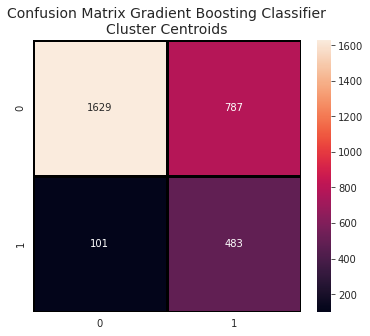

In [95]:
#Start time
start_time = time.time()

model=GradientBoostingClassifier(random_state=2022)
model.fit(X_train_cc, y_train_cc)
y_pred = model.predict(X_test)
strmodel = f'Gradient Boosting Classifier\nCluster Centroids'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelGBC+=[tuple(['Tanpa Resampling'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'Gradient Boosting Classifier Cluster Centroids'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

{'classifier__learning_rate': 0.5, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Model: Gradient Boosting Classifier
Tuning
Cluster Centroids
Confusion Matrix
[[ 960 1456]
 [  58  526]]
Accuracy: 49.53
Precision: 26.54
Recall: 90.07
F1-score: 41.00
AUC: 64.90

Time: 1226.5820648670197 seconds


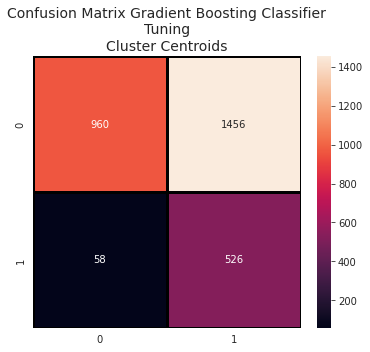

In [96]:
#Start time
start_time = time.time()

pipeline = imbpipeline(steps = [['Cluster Centroids', ClusterCentroids(random_state=2022)],
                                ['classifier', GradientBoostingClassifier(random_state=2022)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                   shuffle=True,
                                   random_state=11)
    
param_grid = {'classifier__max_depth':[5,10, 15, 20],
              'classifier__n_estimators':[100, 200],
              'classifier__learning_rate':[0.1,0.5,1.0],
              'classifier__subsample':[0.5, 0.8, 0.9, 1.0]
             }
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
best_prm = grid_search.best_params_
print(best_prm)
strmodel = f'Gradient Boosting Classifier\nTuning\nCluster Centroids'
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)
        
plt.title(f"Confusion Matrix {strmodel}",fontsize=14)
modelGBC+=[tuple(['Cluster Centroids'])+metrics(strmodel, model, y_test, y_pred.round())]
smodel = 'Gradient Boosting Classifier Tuning Cluster Centroids'

#Execution time
print("Time: %s seconds" % (time.time() - start_time))

In [97]:
modelGBC=pd.DataFrame(modelGBC)
modelGBC.columns=['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']
modelGBC[['Teknik','Model','Recall']]

,Teknik,Model,Recall
0,Tanpa Resampling,Gradient Boosting Classifier,47.95
1,Tanpa Resampling,Gradient Boosting Classifier\nCluster Centroids,82.71
2,Cluster Centroids,Gradient Boosting Classifier\nTuning\nCluster ...,90.07


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Recall Pada Algoritma Gradient Boosting Classifier')

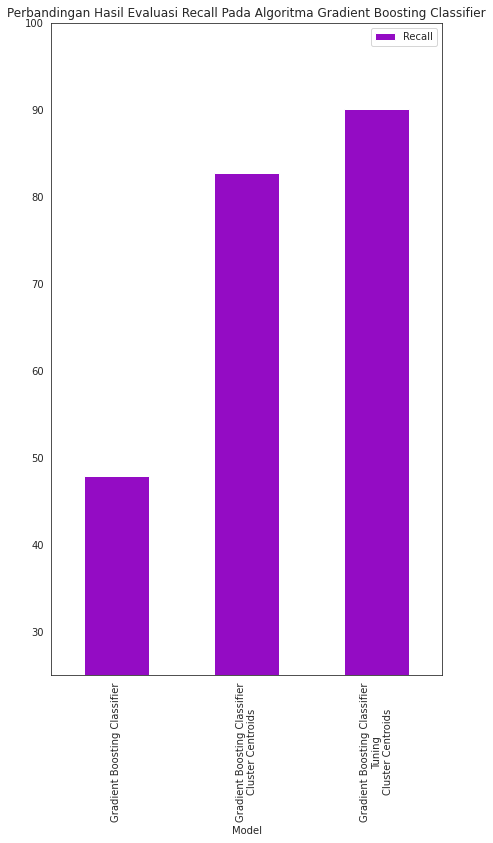

In [98]:
modelGBC[['Teknik','Model','Recall']].plot(x='Model', kind='bar', color=colors, figsize=(7, 12))
plt.ylim([25, 100])
plt.title("Perbandingan Hasil Evaluasi Recall Pada Algoritma Gradient Boosting Classifier")

In [99]:
# modelXGBC[['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']]
# mXGB = modelXGBC[['Teknik','Model','recall']]

In [100]:
# modelLGBM[['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']]

In [101]:
# modelGBC[['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']]

In [102]:
# r_model = 

In [103]:
mXGBC = modelXGBC[['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']]
mLGBM = modelLGBM[['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']]
mGBC = modelGBC[['Teknik','Model','Accuracy','Precision','Recall','F1_score', 'AUC']]

In [104]:
resultsTuning=pd.concat([mXGBC, mLGBM, mGBC],axis=0)

In [105]:
resultsTuning

,Teknik,Model,Accuracy,Precision,Recall,F1_score,AUC
0,Tanpa Resampling,XGBClassifier,86.47,71.71,50.34,59.15,72.77
1,Cluster Centroids,XGBClassifier\nCluster Centroids,54.60,28.56,88.70,43.20,67.53
2,Cluster Centroids,XGBClassifier\nTuning\nCluster Centroids,54.57,28.84,90.92,43.79,68.35
0,Tanpa Resampling,LGBM Classifier,86.90,74.30,50.00,59.77,72.91
1,Cluster Centroids,LGBM Classifier\nCluster Centroids,57.40,29.90,88.36,44.68,69.14
2,Cluster Centroids,LGBM Classifier\nTuning\nCluster Centroids,54.30,28.74,91.10,43.70,68.25
0,Tanpa Resampling,Gradient Boosting Classifier,87.10,77.13,47.95,59.13,72.25
1,Tanpa Resampling,Gradient Boosting Classifier\nCluster Centroids,70.40,38.03,82.71,52.10,75.07
2,Cluster Centroids,Gradient Boosting Classifier\nTuning\nCluster ...,49.53,26.54,90.07,41.00,64.90


Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Pada Tiap Algoritma')

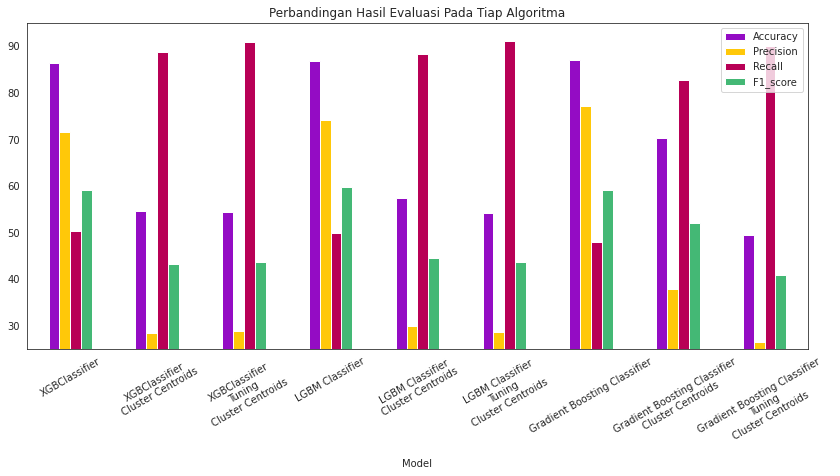

In [106]:
resultsTuning[['Teknik','Model','Accuracy','Precision','Recall','F1_score']].plot(x='Model', kind='bar', color=colors, figsize=(14, 6))
plt.ylim([25, 95])
plt.xticks(rotation=30)
plt.title("Perbandingan Hasil Evaluasi Pada Tiap Algoritma")

Text(0.5, 1.0, 'Perbandingan Hasil Evaluasi Recall Pada Tiap Algoritma')

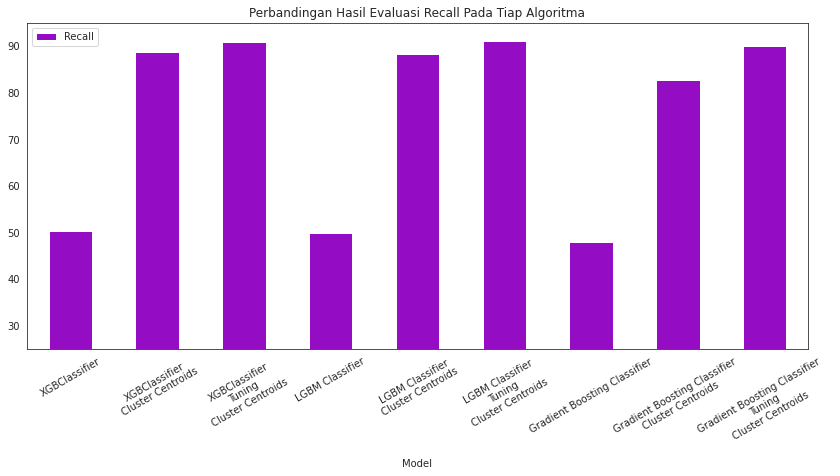

In [107]:
resultsTuning[['Teknik','Model','Recall']].plot(x='Model', kind='bar', color=colors, figsize=(14, 6))
plt.ylim([25, 95])
plt.xticks(rotation=30)
plt.title("Perbandingan Hasil Evaluasi Recall Pada Tiap Algoritma")

#**Kesimpulan**
Hasil dari eksperimen memperoleh recall  sebesar 90.58% untuk LGBM Classifier, 89.90% untuk Gradient Boosting Classifier, dan 89.73% untuk XGB Classifier. Penerapan gridserachcv dengan algoritma LGBM Classifier dengan teknik resampling cluster centroid merupakan model yang paling baik dengan perolehan recall sebesar 90,58%. Hanya saja dalam eksperimen ini perlu dipertimbangkan lagi terkait dengan nilai precision yang cenderung kecil.